# Analysis of Airplane Crashes and Safety Trends since 1908: 
## Has the Safety of Air Travel Improved over the Years?

This page explores historical data on airplane crashes, to determine whether the safety of air travel has improved over the years. The analysis covers data collection, cleaning, exploratory and in-depth analysis, and visualisations to understand trends and draw insights.

#### Introduction
Outline what I'm exploring and its importance. Inc relevant background information.

#### Data Collection
The dataset used in this analysis comes from Kaggle.com and contains records of airplane crashes since 1908...

In [ ]:
# calculate crashes per year 
crashes_per_year = crashes.groupby('Year').size()

# plot number of crashes per yearc
plt.figure(figsize=(12, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker = 'o', linestyle = '-')
plt.title('Number of Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# calculate total fatalities per year
fatalities_per_year = crashes.groupby('Year')['Fatalities'].sum()

# plot total fatalities per year 
plt.figure(figsize=(12, 6))
plt.plot(fatalities_per_year.index, fatalities_per_year.values, marker = 'o', linestyle = '-', color = 'red')
plt.title('Total Fatalities from Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.show()

In [3]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

Begin by importing the relevant data set on plane crashes since 1908.

In [274]:
# Load the data
crashes = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


#### Data Cleaning and Preprocessing


Detail steps taken to prepare for analysis - dealing with missing values - converting to datetime etc

In [275]:

# Make sure the 'Date' column is converted to datetime
crashes['Date'] = pd.to_datetime(crashes['Date'])

# Now you should be able to access `.dt` and its properties
crashes['Year'] = crashes['Date'].dt.year


In [276]:
# Handling missing values

crashes.fillna({'Time': 'Unknown', 
                'Operator': 'Unknown', 
                'Flight #' : 'Unknown', 
                'Registration' : 'Unknown', 
                'Route' : 'Unknown', 
                'cn/In' : 'Unknown'}, inplace=True)

Now, convert the date format to be UK standard form. Also explore how to deal with missing values.


In [14]:
# Correct data type

# Convert 'Date' from MM/DD/YYYY to datetime
#crashes['Date'] = pd.to_datetime(crashes['Date'], format='%m/%d/%Y')

# Replace 'Date' column with the standard UK form DD/MM/YYYY
#crashes['Date'] = crashes['Date'].dt.strftime('%d/%m/%Y')

#### Exploratory Data Analysis (EDA)

Initially look at the data to understand its structure - summary statistics and visualisations.

In [8]:
sns.set_style("whitegrid")

Create basic visualisations of the data.

Trends over the years...

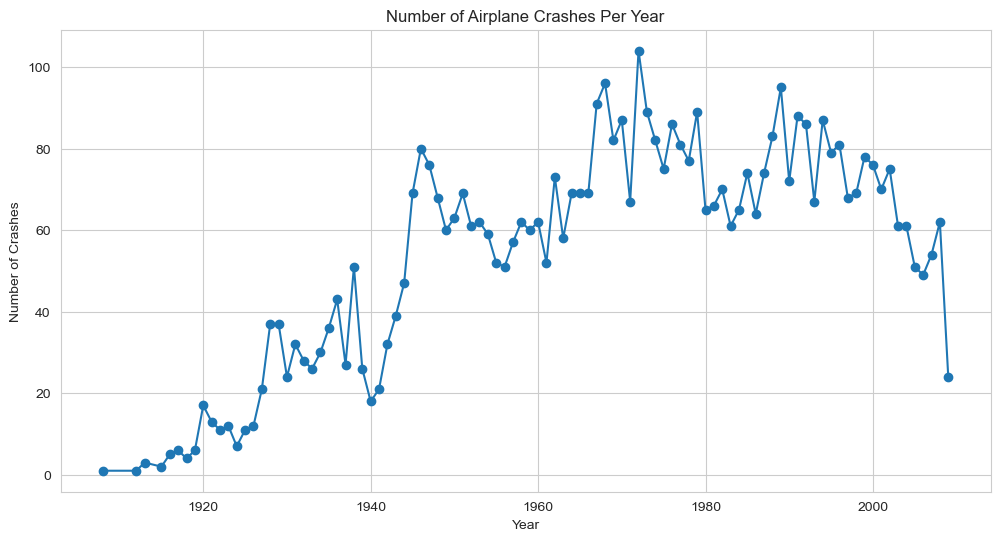

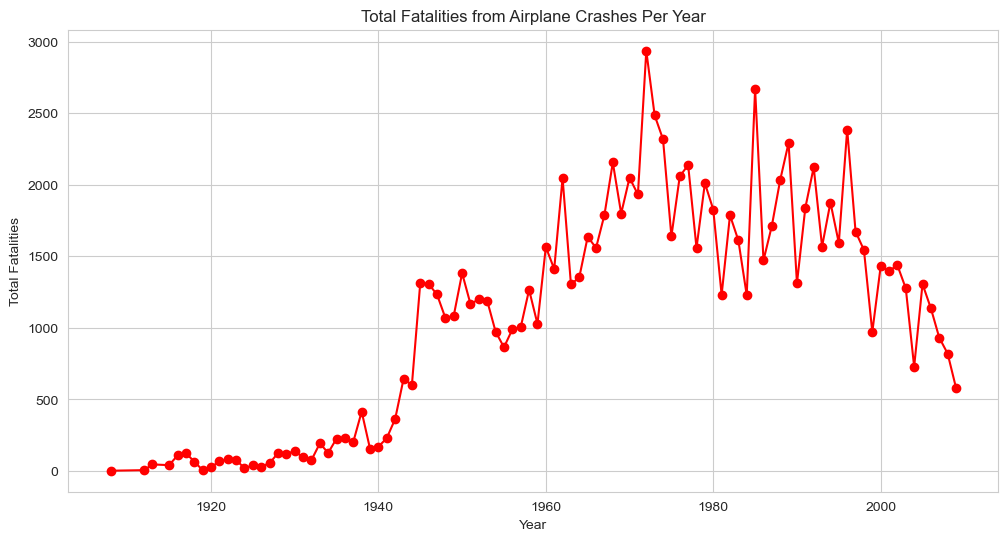

In [30]:
# Assuming crashes is already loaded and prepared with 'Date' as datetime
# Create a new column 'Year' for aggregation purposes
# crashes['Year'] = crashes['Date'].dt.year

# Calculate number of crashes per year
crashes_per_year = crashes.groupby('Year').size()

# Plot number of crashes per year as an individual plot
plt.figure(figsize=(12, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o', linestyle='-')
plt.title('Number of Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# Calculate total fatalities per year
fatalities_per_year = crashes.groupby('Year')['Fatalities'].sum()

# Plot total fatalities per year as an individual plot
plt.figure(figsize=(12, 6))
plt.plot(fatalities_per_year.index, fatalities_per_year.values, marker='o', linestyle='-', color='red')
plt.title('Total Fatalities from Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.show()


In [16]:
import plotly.express as px
import pandas as pd

# Assuming 'crashes' DataFrame is already loaded and 'Year' has been extracted
crashes['Year'] = crashes['Date'].dt.year
crashes_per_year = crashes.groupby('Year').size().reset_index()
crashes_per_year.columns = ['Year', 'Number of Crashes']

# Create an interactive plot using Plotly Express
fig = px.line(crashes_per_year, 
              x='Year', 
              y='Number of Crashes', 
              title='Number of Airplane Crashes Per Year',
              markers=True,  # To add markers as in the original plot
              labels={'Number of Crashes': 'Number of Crashes', 'Year': 'Year'})

# Show the figure
fig.show()

# If you need to embed this in a web page:
# fig.write_html('path/to/file.html')  # Save the plot as an HTML file


#### Comparative Analysis

Compare different time periods, types of aircraft or airlines

Explore what percentage of plane crashes were military or commercial.

In [255]:
# Assuming 'crashes' DataFrame is already loaded
# Categorize each crash
crashes['Type'] = crashes['Operator'].apply(lambda x: 'Military' if 'Military' in str(x) else 'Commercial')

# Group by 'Year' and 'Type' and count the number of crashes
crashes_per_year_type = crashes.groupby(['Year', 'Type']).size().reset_index(name='Number of Crashes')

# Create an interactive plot using Plotly Express with color distinction
fig = px.line(crashes_per_year_type, 
              x='Year', 
              y='Number of Crashes', 
              color='Type',  # Differentiate lines by 'Type'
              title='Number of Airplane Crashes Per Year by Type',
              markers=True,  # To add markers as in the original plot
              labels={'Number of Crashes': 'Number of Crashes', 'Year': 'Year', 'Type': 'Operator Type'})

# Show the figure
fig.show()

# If you need to embed this in a web page:
# fig.write_html('path/to/file.html')  # Save the plot as an HTML file


In [1]:
from geopy.geocoders import Nominatim

In [32]:
# Instantiate a geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to geocode a location name
def geocode_location(location):
    try:
        location = geolocator.geocode(location)
        return (location.latitude, location.longitude)
    except:
        # Return a tuple of NaNs if something goes wrong
        return (np.nan, np.nan)

# Geocode each location (this will take a while depending on the number of locations)
crashes['Coordinates'] = crashes['Location'].apply(geocode_location)

# Split coordinates into two columns
crashes[['Latitude', 'Longitude']] = pd.DataFrame(crashes['Coordinates'].tolist(), index=crashes.index)

In [ ]:

# Load your data
crashes = pd.read_csv('path_to_your_data.csv')

# Instantiate a geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to geocode a location name
def geocode_location(location):
    try:
        location = geolocator.geocode(location)
        return (location.latitude, location.longitude)
    except:
        # Return a tuple of NaNs if something goes wrong
        return (np.nan, np.nan)

# Geocode each location (this will take a while depending on the number of locations)
crashes['Coordinates'] = crashes['Location'].apply(geocode_location)

# Split coordinates into two columns
crashes[['Latitude', 'Longitude']] = pd.DataFrame(crashes['Coordinates'].tolist(), index=crashes.index)


In [20]:
crashes.describe()

,Aboard,Fatalities,Ground,Year
count,5246.000000,5256.000000,5246.000000,5268.000000
mean,27.554518,20.068303,1.608845,1971.300304
std,43.076711,33.199952,53.987827,22.387541
min,0.000000,0.000000,0.000000,1908.000000
25%,5.000000,3.000000,0.000000,1954.000000
50%,13.000000,9.000000,0.000000,1973.000000
75%,30.000000,23.000000,0.000000,1990.000000
max,644.000000,583.000000,2750.000000,2009.000000


In [21]:
print(crashes['Year'].value_counts().sort_index())

1908     1
1912     1
1913     3
1915     2
1916     5
        ..
2005    51
2006    49
2007    54
2008    62
2009    24
Name: Year, Length: 98, dtype: int64


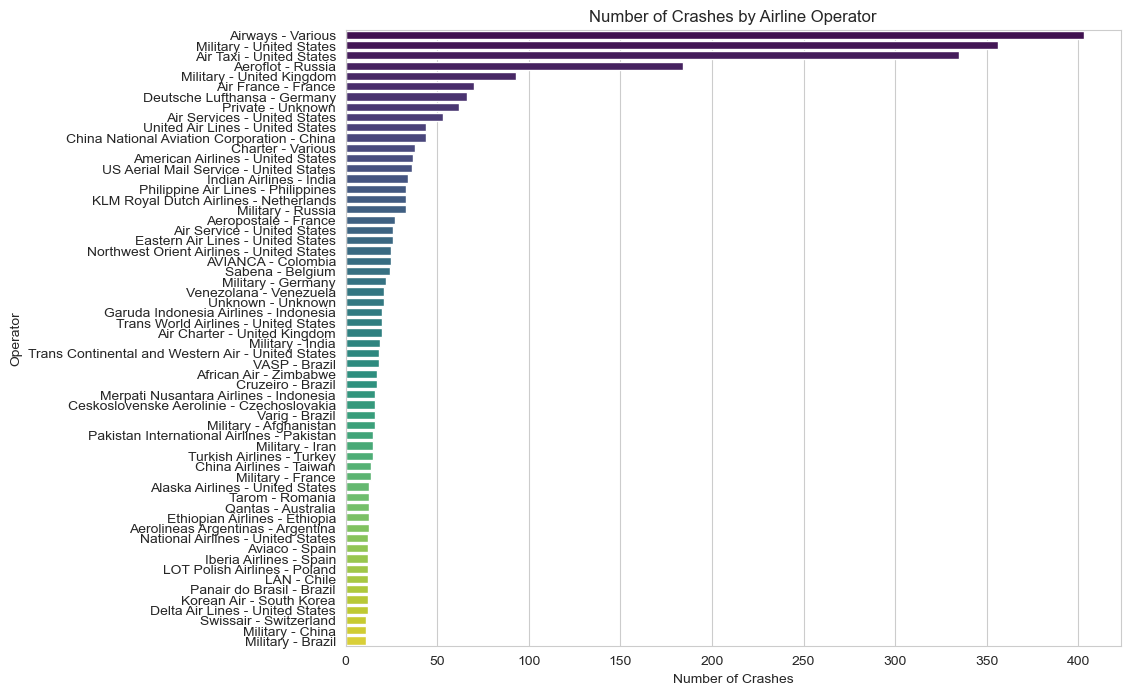

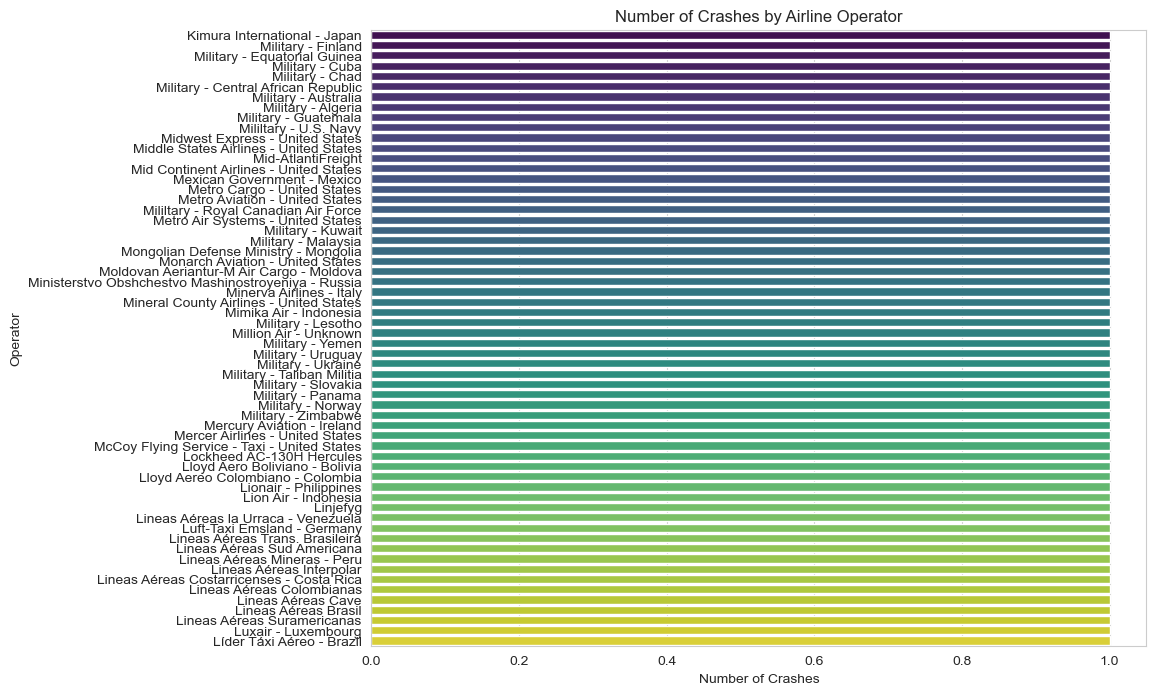

In [254]:
operator_crashes = crashes.groupby('Operator').size().sort_values(ascending=False).head(60)  # Limiting to top 20 for clarity

# Creating a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(y=operator_crashes.index, x=operator_crashes.values, palette='viridis')
plt.title('Number of Crashes by Airline Operator')
plt.xlabel('Number of Crashes')
plt.ylabel('Operator')
plt.show()

l_operator_crashes = crashes.groupby('Operator').size().sort_values(ascending=True).head(60)  # Limiting to top 20 for clarity

# Creating a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(y=l_operator_crashes.index, x=l_operator_crashes.values, palette='viridis')
plt.title('Number of Crashes by Airline Operator')
plt.xlabel('Number of Crashes')
plt.ylabel('Operator')
plt.show()

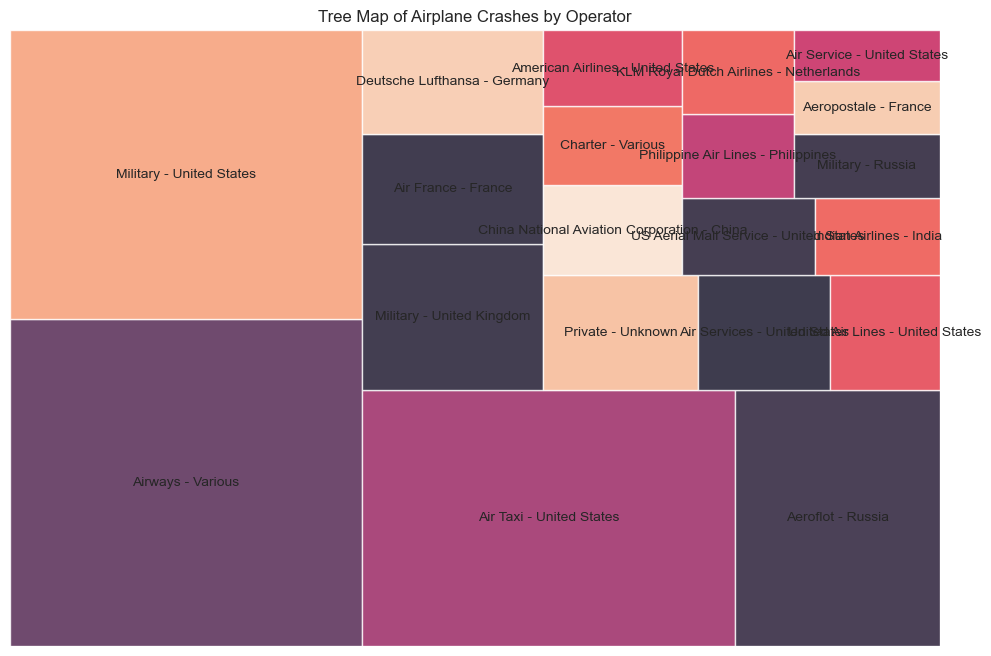

In [253]:
operator_crashes = crashes.groupby('Operator').size().sort_values(ascending=False).head(20)  # Focus on top 20 for clarity

# Generate a tree map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=operator_crashes.values, label=operator_crashes.index, alpha=.8)
plt.axis('off')  # Turn off axis
plt.title('Tree Map of Airplane Crashes by Operator')
plt.show()

In [96]:
import squarify 

In [107]:
pd.set_option('display.max_rows', None) 

In [256]:
military_operators = crashes[crashes['Operator'].str.contains('Military', na=False)]

# Count the occurrences of each unique 'Military' operator
military_operator_variations = military_operators['Operator'].value_counts()

# Display the variations and their counts
military_operator_variations

Military - United States               356
Military - United Kingdom               93
Military - Russia                       33
Military - Germany                      22
Military - India                        19
Military - Afghanistan                  16
Military - Iran                         15
Military - France                       14
Military - China                        11
Military - Brazil                       11
Military - Angola                        9
Military - Japan                         8
Military - Canada                        8
Military - Argentina                     8
Military - Peru                          7
Military - Sri Lanka                     7
Military - Chile                         7
Military - Philippines                   7
Military - Thailand                      6
Military - Venezuela                     6
Military - Pakistan                      6
Military - Indonesia                     6
Military - Congo                         6
Military - 

In [259]:
z = crashes.groupby('Operator').size().sort_index()
pd.set_option('display.max_rows', None)
print(z)


Operator
AB Aerotransport - Sweden                                           5
ACES - Colombia                                                     3
ADC - Nigeria                                                       2
ADES - Colombia                                                     2
AECA - Ecuador                                                      1
AIDA - Germany                                                      1
AIRES - Colombia                                                    2
ALADA - Angola                                                      1
ALFA                                                                1
ALIANSA Colombia                                                    1
ANDESA - Uruguay                                                    1
APRL                                                                1
AREA                                                                2
ARTOP Aerotopografica LDA - Portugal                                1
ATESA      

In [280]:
replacements3 = {
    'A B Aerotransport': 'AB Aerotransport - Sweden',
    'AB Aerotransport': 'AB Aerotransport - Sweden',
    'ACES Colombia': 'ACES - Colombia',
    'ADC Airlines': 'ADC - Nigeria',
    'ADES Colombia': 'ADES - Colombia',
    'AECA Cargo': 'AECA - Ecuador',
    'AIDA': 'AIDA - Germany',
    'AIRES Colombia': 'AIRES - Colombia',
    'ALADA': 'ALADA - Angola',
    'ANDESA': 'ANDESA - Uruguay',
    'ARTOP Aerotopografica LDA': 'ARTOP Aerotopografica LDA - Portugal',
    'ATI': 'ATI - United States',
    'ATI Aircompany': 'ATI - Armenia',
    'AV Air / American Eagle': 'American Eagle - United States',
    'AVENSA': 'AVENSA - Venezuela',
    'AVIANCA': 'AVIANCA - Colombia',
    'AVISPA': 'AVISPA - Spain',
    'AZAL Cargo Company': 'AZAL Cargo Company - Azerbaijan',
    'Aaxico Airlines': 'Aaxico Airlines - United States',
    'Ababeel Aviaition': 'Ababeel Aviaition - Sudan',
    'Abakan Airlines': 'Abakan Airlines - Russia',
    'Aca-Ancargo': 'Aca-Ancargo - United States',
    'Ace Flying Service': 'Ace Flying Service - United States',
    'Acme Air': 'Acme Air - United States',
    'Action Air Express Inc. - Air Taxi': 'Action Air Express - United States',
    'Action Airlines': 'Action Airlines - United States',
    'Adam Air': 'Adam Air - Indonesia',
    'Aden Airways': 'Aden Airways - Yemen',
    'Advance Airlines': 'Advance Airlines - Australia',
    'Adventure Airlines': 'Adventure Airlines - United States',
    'Aegler Stuart Flying Service  / Private': 'Aegler Stuart Flying Service - United States',
    'Aer Lingus': 'Aer Lingus - Ireland',
    'Aer Turas': 'Aer Turas - Ireland',
    'Aeralpi': 'Aeralpi - Italy',
    'Aerevias Centrales Air Service': 'Aerevias Centrales Air Service - Colombia',
    'Aerial Transit Company': 'Aerial Transit Company - United States',
    'Aero Air': 'Aero Air - United States',
    'Aero Asahi': 'Aero Asahi - Japan',
    'Aero Cargo': 'Aero Cargo - France',
    'Aero Club Libya': 'Aero Club Libya - Libya',
    'Aero Clube de Volta Redonda': 'Aero Clube de Volta Redonda - Brazil',
    'Aero Condor': 'Aero Condor - Peru',
    'Aero Cozumel': 'Aero Cozumel - Mexico',
    'Aero Ejecutivos': 'Aero Ejecutivos - Venezuela',
    'Aero Eslava': 'Aero Eslava - Spain',
    'Aero Ferinco Charter': 'Aero Ferinco - Mexico',
    'Aero France': 'Aero France - France',
    'Aero Holland': 'Aero Holland - Netherlands',
    'Aero Jet Express': 'Aero Jet Express - United States',
    'Aero Lloyd': 'Aero Lloyd - Germany',
    'Aero Mayflower Transit Co': 'Aero Mayflower - United States',
    'Aero National - Air Taxi': 'Aero National - United States',
    'Aero O-Y': 'Aero O-Y - Finland',
    'Aero PaLease - Air Taxi': 'Aero PaLease - United States',
    'Aero Pantanal - Air Taxi': 'Aero Pantanal - Brazil',
    'Aero Peru': 'Aero Peru - Peru',
    'Aero Sudpacifico': 'Aero Sudpacifico - Mexico',
    'Aero Taxis Equatorianos': 'Aero Taxis Equatorianos - Ecuador',
    'Aero Transportes': 'Aero Transportes - Mexico',
    'Aero Transporti Italiani': 'Aero Transporti Italiani - Italy',
    'Aero Tropical': 'Aero Tropical - Angola',
    'Aero-Tropics': 'Aero-Tropics - Australia',
    'Aerocalifornia': 'Aerocalifornia - Mexico',
    'Aerocaribbean - Charter': 'Aerocaribbean - Cuba',
    'Aerocaribe': 'Aerocaribe - Mexico',
    'Aerochasqui': 'Aerochasqui - Peru',
    'Aerocom': 'Aerocom - Moldova',
    'Aerocondor': 'Aerocondor - Portugal',
    'Aerocondor de Colombia': 'Aerocondor - Colombia',
    'Aerocontroctors - Charter': 'Aerocontroctors - Nigeria',
    'Aerocord': 'Aerocord - Chile',
    'Aerocosta Colombia': 'Aerocosta - Colombia',
    'Aeroejecutivos Colombia': 'Aeroejecutivos - Colombia',
    'Aeroespresso': 'Aeroespresso - Italy',
    'Aeroextra': 'Aeroextra - Mexico',
    'Aeroflite Services': 'Aeroflite Services - United States',
    'Aeroflot': 'Aeroflot - Russia',
    'Aerogulf': 'Aerogulf - UAE',
    'Aerolatino (Aerocaribe)': 'Aerolatino - Mexico',
    'Aeroleasing - Air Taxi': 'Aeroleasing - Switzerland',
    'Aeroleo Taxi Aereo': 'Aeroleo Taxi Aereo - Brazil',
    'Aerolift': 'Aerolift - South Africa',
    'Aerolift Philippines': 'Aerolift - Philippines',
    'Aerolineas Abaroa': 'Aerolineas Abaroa - Bolivia',
    'Aerolineas Argentinas': 'Aerolineas Argentinas - Argentina',
    'Aerolineas Argo': 'Aerolineas Argo - Argentina',
    'Aerolineas Centrales de Colombia': 'Aerolineas Centrales - Colombia',
    'Aerolineas Condor': 'Aerolineas Condor - Argentina',
    'Aerolineas Cuahonte': 'Aerolineas Cuahonte - Mexico',
    'Aerolineas El Salvador': 'Aerolineas - El Salvador',
    'Aerolineas Flecha Austral': 'Aerolineas Flecha Austral - Argentina',
    'Aerolineas La Gaviola': 'Aerolineas La Gaviola - Argentina',
    'Aerolineas La Paz': 'Aerolineas La Paz - Bolivia',
    'Aerolineas Litoral Argentina': 'Aerolineas Litoral - Argentina',
    'Aerolineas Nacionales': 'Aerolineas Nacionales - Colombia',
    'Aerolineas TAO': 'Aerolineas TAO - Colombia',
    'Aeromexico': 'Aeromexico - Mexico',
    'Aeromist-Kharkiv': 'Aeromist-Kharkiv - Ukraine',
    'Aeronautical Services - Air Taxi': 'Aeronautical Services - United States',
    'Aeronaves de Mexico': 'Aeronaves de Mexico - Mexico',
    'Aeronaves del Peru': 'Aeronaves del Peru - Peru',
    'Aeronica': 'Aeronica - Nicaragua',
    'Aeronor Chile': 'Aeronor Chile - Chile',
    'Aeronorte': 'Aeronorte - Brazil',
    'Aeronorte Colombia': 'Aeronorte - Colombia',
    'Aeropeca': 'Aeropeca - Ecuador',
    'Aeroperlas': 'Aeroperlas - Panama',
    'Aeroperu': 'Aeroperu - Peru',
    'Aeropesca Colombia': 'Aeropesca - Colombia',
    'Aeropol': 'Aeropol - Poland',
    'Aeropostale': 'Aeropostale - France',
    'Aeroput': 'Aeroput - Serbia',
    'Aeroservice International': 'Aeroservice International - United States',
    'Aeroservice S de RL': 'Aeroservice S de RL - Mexico',
    'Aeroservicios Empresariales de Durango': 'Aeroservicios Empresariales - Mexico',
    'Aerosucre Colombia': 'Aerosucre - Colombia',
    'Aerosweet Airlines (LVOV)': 'Aerosweet Airlines - Ukraine',
    'Aerotaca': 'Aerotaca - Colombia',
    'Aerotaxi Manaus': 'Aerotaxi Manaus - Brazil',
    'Aerotechnia': 'Aerotechnia - Russia',
    'Aerotransportes Petroleros': 'Aerotransportes Petroleros - Argentina',
    'Aerotuy airline': 'Aerotuy - Venezuela',
    'Aerovalles': 'Aerovalles - Mexico',
    'Aerovanguardia': 'Aerovanguardia - Colombia',
    'Aerovias Brasil': 'Aerovias - Brazil',
    'Aerovias Condor': 'Aerovias Condor - Bolivia',
    'Aerovias Contreras': 'Aerovias Contreras - Mexico',
    'Aerovias Cuba International': 'Aerovias Cuba International - Cuba',
    'Aerovias Guest': 'Aerovias Guest - Mexico',
    'Aerovias Halcon': 'Aerovias Halcon - Mexico',
    'Aerovias Rojas': 'Aerovias Rojas - Mexico',
    'Aerovias Urraca': 'Aerovias Urraca - Panama',
    'Aerovias Venezolanas SA (Venezuela)': 'Aerovias Venezolanas - Venezuela',
    'Aerovias de Guatemala SA': 'Aerovias de Guatemala - Guatemala',
    'Aerovias del Norte': 'Aerovias del Norte - Mexico',
    'Aerovias del Valle': 'Aerovias del Valle - Mexico',
    'Africa One Congo': 'Africa One - Congo',
    'African Air': 'African Air - Zimbabwe',
    'African Commuter Services': 'African Commuter Services - South Africa',
    'Agape Flight Inc.': 'Agape Flight - United States',
    'Agco Corp': 'Agco Corp - United States',
    'Agee Flying Service - Air Taxi': 'Agee Flying Service - United States',
    'Agencia Interamericana de Aviada': 'Agencia Interamericana de Aviada - Mexico',
    'Aigle Azur': 'Aigle Azur - France',
    'Air Mali': 'Air Mali - Mali',
    'Air 70': 'Air 70 - United Kingdom',
    'Air Affaires Gabon': 'Air Affaires Gabon - Gabon',
    'Air Afrique': 'Air Afrique - Ivory Coast',
    'Air Albatross': 'Air Albatross - Germany',
    'Air Algerie': 'Air Algerie - Algeria',
    'Air Ambulance - Med-Trans Corp.': 'Air Ambulance - Med-Trans Corp. - United States',
    'Air Amercia': 'Air America - United States',
    'Air America': 'Air America - United States',
    'Air Angles Inc.': 'Air Angles - United States',
    'Air Anguilla': 'Air Anguilla - Anguilla',
    'Air Atlas': 'Air Atlas - Morocco',
    'Air Bissau': 'Air Bissau - Guinea-Bissau',
    'Air Bleu': 'Air Bleu - France',
    'Air Cameroon': 'Air Cameroon - Cameroon',
    'Air Canada': 'Air Canada - Canada',
    'Air Caraibes': 'Air Caraibes - Guadeloupe',
    'Air Cargo Carriers': 'Air Cargo Carriers - United States',
    'Air Cargo Express': 'Air Cargo Express - United States',
    'Air Carriers': 'Air Carriers - United States',
    'Air Carriers Express Services Inc': 'Air Carriers Express Services - United States',
    'Air Central': 'Air Central - Japan',
    'Air Chaparral - Air Taxi': 'Air Chaparral - United States',
    'Air Charter': 'Air Charter - United Kingdom',
    'Air Charter - Tanzanian Air Services': 'Air Charter - Tanzania',
    'Air China': 'Air China - China',
    'Air Comores': 'Air Comores - Comoros',
    'Air Congo': 'Air Congo - Congo',
    'Air Continental': 'Air Continental - United States',
    'Air East': 'Air East - United States',
    'Air Express': 'Air Express - United States',
    'Air Ferry': 'Air Ferry - United Kingdom',
    'Air Ferry Ltd': 'Air Ferry - United Kingdom',
    'Air Fiji': 'Air Fiji - Fiji',
    'Air Fiordland': 'Air Fiordland - New Zealand',
    'Air Flamence': 'Air Flamence - France',
    'Air Florida': 'Air Florida - United States',
    'Air France': 'Air France - France',
    'Air Freight New Zealand': 'Air Freight New Zealand - New Zealand',
    'Air Gabon': 'Air Gabon - Gabon',
    'Air Gaspé': 'Air Gaspé - Canada',
    'Air Georgian': 'Air Georgian - Canada',
    'Air Global': 'Air Global - United Kingdom',
    'Air Guadeloupe': 'Air Guadeloupe - Guadeloupe',
    'Air Guinee': 'Air Guinee - Guinea',
    'Air Haiti International': 'Air Haiti International - Haiti',
    'Air Hawaii': 'Air Hawaii - United States',
    'Air Illinois': 'Air Illinois - United States',
    'Air India': 'Air India - India',
    'Air Inter': 'Air Inter - France',
    'Air Iowa': 'Air Iowa - United States',
    'Air Ivoire': 'Air Ivoire - Ivory Coast',
    'Air Ivorie': 'Air Ivorie - Ivory Coast',
    'Air Jordan': 'Air Jordan - Jordan',
    'Air Karibu': 'Air Karibu - Kenya',
    'Air Kasai': 'Air Kasai - Democratic Republic of the Congo',
    'Air Lanka': 'Air Lanka - Sri Lanka',
    'Air Laos': 'Air Laos - Laos',
    'Air Liberia': 'Air Liberia - Liberia',
    'Air Littoral': 'Air Littoral - France',
    'Air Logistics': 'Air Logistics - United States',
    'Air Luxor': 'Air Luxor - Portugal',
    'Air Madagascar': 'Air Madagascar - Madagascar',
    'Air Malawi': 'Air Malawi - Malawi',
    'Air Mali': 'Air Mali - Mali',
    'Air Manila': 'Air Manila - Philippines',
    'Air Manitoba': 'Air Manitoba - Canada',
    'Air Martinique': 'Air Martinique - Martinique',
    'Air Mauritanie': 'Air Mauritanie - Mauritania',
    'Air Melanesie': 'Air Melanesie - Vanuatu',
    'Air Memphis': 'Air Memphis - Egypt',
    'Air Methods / ClassiHelicopters': 'Air Methods / ClassiHelicopters - United States',
    'Air Moorea': 'Air Moorea - French Polynesia',
    'Air Nautic': 'Air Nautic - France',
    'Air New England': 'Air New England - United States',
    'Air New Zealand': 'Air New Zealand - New Zealand',
    'Air Niagara': 'Air Niagara - Canada',
    'Air North': 'Air North - Canada',
    'Air North Queensland': 'Air North Queensland - Australia',
    'Air Ocean': 'Air Ocean - Ukraine',
    'Air Ohio - Air Taxi': 'Air Ohio - United States',
    'Air One Executive': 'Air One Executive - Italy',
    'Air Ontario': 'Air Ontario - Canada',
    'Air Orient': 'Air Orient - France',
    'Air Outre-Mer': 'Air Outre-Mer - France',
    'Air Outremer': 'Air Outremer - France',
    'Air Pennsylvania - Air Taxi': 'Air Pennsylvania - United States',
    'Air Pereira': 'Air Pereira - Colombia',
    'Air Philippines': 'Air Philippines - Philippines',
    'Air Rainbow': 'Air Rainbow - United States',
    'Air Reconnaissance Unit of Liberia': 'Air Reconnaissance Unit of Liberia - Liberia',
    'Air Rhodesia': 'Air Rhodesia - Rhodesia',
    'Air Rouergue': 'Air Rouergue - France',
    'Air Saint Maurice Inc.': 'Air Saint Maurice - Canada',
    'Air Satellite': 'Air Satellite - Canada',
    'Air Senegal': 'Air Senegal - Senegal',
    'Air Senegal / Gambia Airways': 'Air Senegal / Gambia Airways - Senegal',
    'Air Serv Internatiional/CemAir': 'Air Serv International/CemAir - United States',
    'Air Service - Air Taxi': 'Air Service - United States',
    'Air Services': 'Air Services - United States',
    'Air Sinai': 'Air Sinai - Egypt',
    'Air South': 'Air South - United States',
    'Air St. Martin': 'Air St. Martin - Saint Martin',
    'Air Sunshine': 'Air Sunshine - United States',
    'Air São Tomé': 'Air São Tomé - São Tomé and Príncipe',
    'Air Tahiti': 'Air Tahiti - French Polynesia',
    'Air Tahoma': 'Air Tahoma - United States',
    'Air Taroma': 'Air Taroma - Italy',
    'Air Taxi': 'Air Taxi - United States',
    'Air Transit - Air Taxi': 'Air Transit - United States',
    'Air Transport Associates': 'Air Transport Associates - United States',
    'Air Trek': 'Air Trek - United States',
    'Air Turks & Caicos': 'Air Turks & Caicos - Turks and Caicos Islands',
    'Air US / Private': 'Air US / Private - United States',
    'Air Union': 'Air Union - Russia',
    'Air Vietnam (South Vietnam)': 'Air Vietnam - South Vietnam',
    'Air West': 'Air West - United States',
    'Air West Airlines Ltd.': 'Air West Airlines - Canada',
    'Air Wisconsin': 'Air Wisconsin - United States',
    'Air ambulance - Mercy Air Services': 'Air ambulance - Mercy Air Services - United States',
    'Air taxi': 'Air Taxi - United States',
    'Air-Lift Commuter': 'Air-Lift Commuter - United States',
    'AirNow': 'AirNow - United States',
    'AirWest Airlines': 'AirWest Airlines - United States',
    'Airborne Express': 'Airborne Express - United States',
    'Airborne Transport': 'Airborne Transport - United States',
    'Airbus Industrie': 'Airbus Industrie - European Union',
    'Airco Charters - Air Taxi': 'Airco Charters - Canada',
    'Aircraft Charter Group Inc': 'Aircraft Charter Group - United States',
    'Aircraft Transport and Travel': 'Aircraft Transport and Travel - United Kingdom',
    'Airfast Indonesia': 'Airfast Indonesia - Indonesia',
    'Airfast Services': 'Airfast Services - Indonesia',
    'Airline Transport': 'Airline Transport - Various',
    'Airline Transport Carriers': 'Airline Transport Carriers - Various',
    'Airlines of Australia': 'Airlines of Australia - Australia',
    'Airlines of PNG': 'Airlines of PNG - Papua New Guinea',
    'Airlink': 'Airlink - South Africa',
    'Airquarius Aviation - Charter': 'Airquarius Aviation - South Africa',
    'Airtech Rajawaldi Udara': 'Airtech Rajawaldi Udara - Indonesia',
    'Airwave Transport': 'Airwave Transport - United States',
    'Airwork': 'Airwork - New Zealand',
    'Aitalia': 'Aitalia - Italy',
    'Akhal Air': 'Akhal Air - Turkmenistan',
    'Aktiebolaget Aerotransport': 'Aktiebolaget Aerotransport - Sweden',
    'Ala Littoria': 'Ala Littoria - Italy',
    'Alada': 'Alada - Angola',
    'Alamo Airways': 'Alamo Airways - United States',
    'Alantis Aviation': 'Alantis Aviation - Portugal',
    'Alas Chiricanas': 'Alas Chiricanas - Panama',
    'Alas del Sur': 'Alas del Sur - Argentina',
    'Alaska Aeronautical Industries': 'Alaska Aeronautical Industries - United States',
    'Alaska Airlines': 'Alaska Airlines - United States',
    'Alaska Coastal Airlines': 'Alaska Coastal Airlines - United States',
    'Alaska Helicopter - Air Taxi': 'Alaska Helicopter - United States',
    'Alaska International Air': 'Alaska International Air - United States',
    'Alaska Travel': 'Alaska Travel - United States',
    'Alaska-Washington Airways': 'Alaska-Washington Airways - United States',
    'Albancion Circulo': 'Albancion Circulo - Spain',
    'Alia Royal Jordanian Airlines': 'Alia Royal Jordanian Airlines - Jordan',
    'Alii Air Hawaii - Air Taxi': 'Alii Air Hawaii - United States',
    'Alitalia': 'Alitalia - Italy',
    'All Nippon Airways': 'All Nippon Airways - Japan',
    'All Nippon Airways /  Japanese Air Force': 'All Nippon Airways / Japanese Air Force - Japan',
    'Allegheny Airlines': 'Allegheny Airlines - United States',
    'Allegheny Airlines / Forth Corporation': 'Allegheny Airlines / Forth Corporation - United States',
    'Alliance Airlines': 'Alliance Airlines - Australia',
    'Allied Air Freight': 'Allied Air Freight - United States',
    'Aloha Airlines': 'Aloha Airlines - United States',
    'Aloha Island Air': 'Aloha Island Air - United States',
    'Alpa Servicios Aéreos': 'Alpa Servicios Aéreos - Argentina',
    'Alpena Flying Service - Air Taxi': 'Alpena Flying Service - United States',
    'Alpha Airways': 'Alpha Airways - Greece',
    'Alpine Air Express': 'Alpine Air Express - United States',
    'Alpine Aviation': 'Alpine Aviation - Canada',
    'AltusFlying Service - Air Taxi': 'AltusFlying Service - United States',
    'Alva Aircraft Service - Taxi': 'Alva Aircraft Service - United States',
    'Alyemda': 'Alyemda - Yemen',
    'Alyemda Airlines': 'Alyemda Airlines - Yemen',
    'Amazonese Importacao e Exportacao': 'Amazonese Importacao e Exportacao - Brazil',
    'Ambler Air Service': 'Ambler Air Service - United States',
    "Amee de l'Air": "Amee de l'Air - France",
    'American Air  Export & Import Co.': 'American Air Export & Import Co. - United States',
    'American Airlines': 'American Airlines - United States',
    'American Airlines / Private': 'American Airlines - United States',
    'American Airways': 'American Airways - United States',
    'American Eagle': 'American Eagle - United States',
    'American Export Airlines': 'American Export Airlines - United States',
    'American Express Leasing': 'American Express Leasing - United States',
    'American Flyers Airline': 'American Flyers Airline - United States',
    'American International Airways': 'American International Airways - United States',
    'American Jet': 'American Jet - United States',
    'American Overseas Airlines': 'American Overseas Airlines - United States',
    'American Virginia': 'American Virginia - United States',
    'Ameriflight': 'Ameriflight - United States',
    'Ameristar Jet Charter': 'Ameristar Jet Charter - United States',
    'Amphibians': 'Amphibians - United States',
    'Anchorage Helicopter - Air Taxi': 'Anchorage Helicopter - United States',
    'Angola Air Charter': 'Angola Air Charter - Angola',
    'Ansett ANA': 'Ansett ANA - Australia',
    'Ansett Airlines of Papua New Guinea': 'Ansett Airlines of Papua New Guinea - Papua New Guinea',
    'Ansett New Zealand': 'Ansett New Zealand - New Zealand',
    'Antilles Air': 'Antilles Air - Netherlands Antilles',
    'Antillian Airlines': 'Antillian Airlines - Netherlands Antilles',
    'Antillies Air - Air Taxi': 'Antillies Air - Netherlands Antilles',
    'Apache Airlines - Air Taxi': 'Apache Airlines - United States',
    'Apline Aviation': 'Apline Aviation - Switzerland',
    'Aquilla Airways': 'Aquilla Airways - United Kingdom',
    'Arall': 'Arall - Italy',
    'Aramar': 'Aramar - Italy',
    'Aramco Associated Company': 'Aramco Associated Company - Saudi Arabia',
    'Ararat Avia': 'Ararat Avia - Armenia',
    'Arax Airlines': 'Arax Airlines - Armenia',
    'Aray-Avia': 'Aray-Avia - Armenia',
    'Archana Airlines': 'Archana Airlines - India',
    'ArctiCircle Air Service': 'ArctiCircle Air Service - Canada',
    'ArctiPacific': 'ArctiPacific - Canada',
    'ArctiTransportation Services': 'ArctiTransportation Services - Canada',
    'ArctiWings & Rotors': 'ArctiWings & Rotors - Canada',
    'Argentina CAA': 'Argentina CAA - Argentina',
    'Ariana Afghan Airlines': 'Ariana Afghan Airlines - Afghanistan',
    'Armavia': 'Armavia - Armenia',
    'Aroostook Air - Air Taxi': 'Aroostook Air - United States',
    'Arrow Airlines': 'Arrow Airlines - United States',
    'Arrow Airways': 'Arrow Airways - United States',
    'Arsenyev Aviation Production Association': 'Arsenyev Aviation Production Association - Russia',
    'Asa Pesada': 'Asa Pesada - Brazil',
    'Asian Spirit': 'Asian Spirit - Philippines',
    'Asiana Airlines': 'Asiana Airlines - South Korea',
    'Aspring Air': 'Aspring Air - United States',
    'Associated Air Transport': 'Associated Air Transport - United States',
    'Associated Airways': 'Associated Airways - Canada',
    'Associated Aviators': 'Associated Aviators - United States',
    'Astrd Wing Aviaiton - Air Taxi': 'Astrd Wing Aviation - United States',
    'Astro Air Taxi': 'Astro Air Taxi - United States',
    'AtlantiAirlines': 'AtlantiAirlines - United States',
    'AtlantiAirways': 'AtlantiAirways - United States',
    'AtlantiCentral Airlines': 'AtlantiCentral Airlines - United States',
    'AtlantiCity Airlines': 'AtlantiCity Airlines - United States',
    'AtlantiCoast Airlines (United Express)': 'AtlantiCoast Airlines - United States',
    'AtlantiSoutheast Airlines': 'AtlantiSoutheast Airlines - United States',
    'Atlasjet Airlines': 'Atlasjet Airlines - Turkey',
    'Atran': 'Atran - Russia',
    'Augusta Aviaiton - Air Taxi': 'Augusta Aviation - United States',
    'Aurukun Air Services': 'Aurukun Air Services - Australia',
    'Austin Airways': 'Austin Airways - Canada',
    'Austral Lineas Aeras (Argentina)': 'Austral Lineas Aeras - Argentina',
    'Australian Aerial Services': 'Australian Aerial Services - Australia',
    'Australian National Airways': 'Australian National Airways - Australia',
    'Austria-Flugdienst': 'Austria-Flugdienst - Austria',
    'Austrian Airlines': 'Austrian Airlines - Austria',
    'Autrex': 'Autrex - France',
    'Avalki Air': 'Avalki Air - Ukraine',
    'Avanti Aviation -Air Taxi': 'Avanti Aviation - United States',
    'Avensa': 'Avensa - Venezuela',
    'Avesca Colombia': 'Avesca Colombia - Colombia',
    'Avia Air Aruba': 'Avia Air Aruba - Aruba',
    'Avia-Taxi': 'Avia-Taxi - Ukraine',
    'Aviaco': 'Aviaco - Spain',
    'Aviaimpex (Macedonia)': 'Aviaimpex - Macedonia',
    'Avianca': 'Avianca - Colombia',
    'Aviastar Mandiri': 'Aviastar Mandiri - Indonesia',
    'Aviateca': 'Aviateca - Guatemala',
    'Aviation Charter - Air Taxi': 'Aviation Charter - United States',
    'Aviation Development Corporation': 'Aviation Development Corporation - Nigeria',
    'Aviation Enterprises': 'Aviation Enterprises - United States',
    'Avicsa': 'Avicsa - Mexico',
    'Avio Linee Italiane': 'Avio Linee Italiane - Italy',
    'Aviogenex (Yugoslavia)': 'Aviogenex - Yugoslavia',
    'Avion Airways': 'Avion Airways - United States',
    'Avionas  Banamex': 'Avionas Banamex - Mexico',
    'Avioriprese Jet Executive': 'Avioriprese Jet Executive - Italy',
    'Avirex': 'Avirex - France',
    'Avisto': 'Avisto - Italy',
    'Avtex Air Services': 'Avtex Air Services - United States',
    'Azerbaijan Airlines': 'Azerbaijan Airlines - Azerbaijan',
    'Azerbaijani Airlines': 'Azerbaijani Airlines - Azerbaijan',
    'Azov Avia Airlines': 'Azov Avia Airlines - Ukraine',
    'Aéreo Ruta Maya': 'Aéreo Ruta Maya - Guatemala',
    'Aérotaxi Cachanilla': 'Aérotaxi Cachanilla - Mexico',
    'BAFIN': 'BAFIN - Germany',
    'BAL Bremerhaven Airline': 'BAL Bremerhaven Airline - Germany',
    'BHS - Brazilian Helicopter Service  Air Taxi': 'BHS - Brazilian Helicopter Service - Brazil',
    'BHS - Brazilian Helicopter Service Air Taxi': 'BHS - Brazilian Helicopter Service - Brazil',
    'BHS - Brazilian Helicopter Services': 'BHS - Brazilian Helicopter Services - Brazil',
    'BKS Air Transport': 'BKS Air Transport - United Kingdom',
    'BOAC': 'BOAC - United Kingdom',
    'Bahri Aviation': 'Bahri Aviation - Saudi Arabia',
    'Baikal Air': 'Baikal Air - Russia',
    'Baker Aero Inc. - Taxi': 'Baker Aero Inc. - United States',
    'Bakhtar Afghan Airlines': 'Bakhtar Afghan Airlines - Afghanistan',
    'Bako Air': 'Bako Air - Nigeria',
    'Balair': 'Balair - Switzerland',
    'Bali International Air Service': 'Bali International Air Service - Indonesia',
    'Balkan Bulgarian Airlines': 'Balkan Bulgarian Airlines - Bulgaria',
    'Bangkok Airways': 'Bangkok Airways - Thailand',
    'Bangladesh Biman': 'Bangladesh Biman - Bangladesh',
    'Bankair': 'Bankair - United States',
    'Bankair Inc. - Air Taxi': 'Bankair Inc. - United States',
    'Bar Harbor Airlines': 'Bar Harbor Airlines - United States',
    'Baron Aviation': 'Baron Aviation - United States',
    'Barrow Air Service - Air Taxi': 'Barrow Air Service - United States',
    'Bashkirian Airlines / DHL Worldwide Express': 'Bashkirian Airlines / DHL Worldwide Express - Russia / Germany',
    'Bassett Complany - Taxi': 'Bassett Company - United States',
    'Bavaria Flug': 'Bavaria Flug - Germany',
    'Bay Land Aviation': 'Bay Land Aviation - United States',
    'Bazair': 'Bazair - Congo',
    'Bearskin Airlines / Air Sandy': 'Bearskin Airlines / Air Sandy - Canada',
    'Beatty Flying Service - Taxi': 'Beatty Flying Service - United States',
    'Belair - Air Taxi': 'Belair - Switzerland',
    'Belgian International Air Services': 'Belgian International Air Services - Belgium',
    'Belize Air International Ltd.': 'Belize Air International - Belize',
    'Bellview Airlines': 'Bellview Airlines - Nigeria',
    'Berkshire Aviation - Air Taxi': 'Berkshire Aviation - United States',
    'Bharat Airways': 'Bharat Airways - India',
    'Big Island Airlines': 'Big Island Airlines - United States',
    'Bimini Air Charter Inc.': 'Bimini Air Charter Inc. - Bahamas',
    'Bimini Airways': 'Bimini Airways - Bahamas',
    'Binter Mediterráneo': 'Binter Mediterráneo - Spain',
    'Blackhawk Int. Airways  - Private charter': 'Blackhawk Int. Airways - United States',
    'Blue Bird Air Service': 'Blue Bird Air Service - United States',
    'Blue Bird Aviation': 'Blue Bird Aviation - Kenya',
    'Blue Hawaiian Helicopters': 'Blue Hawaiian Helicopters - United States',
    'Blue Water Aviation Services': 'Blue Water Aviation Services - Canada',
    'Blue Wing Airlines': 'Blue Wing Airlines - Suriname',
    'Boeing Air Transport': 'Boeing Air Transport - United States',
    'Boeing Aircraft Company': 'Boeing Aircraft Company - United States',
    'Boeing KC-135E': 'Boeing KC-135E - United States',
    'Boise Air Service': 'Boise Air Service - United States',
    'Bombardier Aerospace': 'Bombardier Aerospace - Canada',
    'Bonanza Airlines': 'Bonanza Airlines - United States',
    'Bond Offshore Helicopters': 'Bond Offshore Helicopters - United Kingdom',
    'Borneo Airways': 'Borneo Airways - Malaysia',
    'Bourag Indonesia Airlines': 'Bouraq Indonesia Airlines - Indonesia',
    'Bouraq Indonesia Airlines': 'Bouraq Indonesia Airlines - Indonesia',
    'Braathens': 'Braathens - Norway',
    'Bradley Air Services': 'Bradley Air Services - Canada',
    'Braniff Airlines': 'Braniff Airlines - United States',
    'Braniff Airways': 'Braniff Airways - United States',
    'Bremerton-Seattle Air Taxi / Gorst Air Lines': 'Bremerton-Seattle Air Taxi / Gorst Air Lines - United States',
    'Bristol 170 Freighter 31M': 'Bristol 170 Freighter 31M - United Kingdom',
    'Bristol Aeroplane Co.': 'Bristol Aeroplane Co. - United Kingdom',
    'Bristow Helicopters': 'Bristow Helicopters - United Kingdom',
    'Brit Air': 'Brit Air - France',
    'Britannia Airways': 'Britannia Airways - United Kingdom',
    'Britavia': 'Britavia - United Kingdom',
    'British Aircraft Corporation': 'British Aircraft Corporation - United Kingdom',
    'British Airtours': 'British Airtours - United Kingdom',
    'British Airways': 'British Airways - United Kingdom',
    'British Airways Helicopters': 'British Airways Helicopters - United Kingdom',
    'British Columbia Airways': 'British Columbia Airways - Canada',
    'British Commonwealth PacifiAirlines': 'British Commonwealth Pacific Airlines - United Kingdom',
    'British Eagle International Airlines': 'British Eagle International Airlines - United Kingdom',
    'British International Helicopters': 'British International Helicopters - United Kingdom',
    'British Midland Airways': 'British Midland Airways - United Kingdom',
    'British Overseas Airways': 'British Overseas Airways - United Kingdom',
    'British Overseas Airways /Qantas': 'British Overseas Airways / Qantas - United Kingdom',
    'British South American Airways': 'British South American Airways - United Kingdom',
    'British United Airways': 'British United Airways - United Kingdom',
    'British World Airways': 'British World Airways - United Kingdom',
    'Britt Airways': 'Britt Airways - United States',
    'Broughton Air Servces': 'Broughton Air Services - United States',
    'Broward Aviation Services - Air Taxi': 'Broward Aviation Services - United States',
    'Bruning Aviation': 'Bruning Aviation - United States',
    'Bruno Air': 'Bruno Air - United States',
    'Bruns Air Service - Air Taxi': 'Bruns Air Service - United States',
    'Buckeye Air Service - Air Taxi': 'Buckeye Air Service - United States',
    'Buffalo Narrows Airways': 'Buffalo Narrows Airways - Canada',
    'Bulair TABSO': 'Bulair TABSO - Bulgaria',
    'Burke Air Transport': 'Burke Air Transport - United States',
    'Burlington Air - Air Taxi': 'Burlington Air - United States',
    'Burlington Air Express': 'Burlington Air Express - United States',
    'Burma Airways': 'Burma Airways - Myanmar',
    'Business Air Connection': 'Business Air Connection - United States',
    'Business Aircraft - Air Taxi': 'Business Aircraft - United States',
    'Business Jet Services': 'Business Jet Services - United States',
    'Butler Aviation Inc.': 'Butler Aviation Inc. - United States',
    'By Air': 'By Air - United States',
    'C and C Aviaiton - Air Taxi': 'C and C Aviation - United States',
    'CAAC': 'CAAC - China',
    'CAAC Air TraffiManagement Bureau': 'CAAC Air Traffic Management Bureau - China',
    'CAAK': 'CAAK - North Korea',
    'CAMBA': 'CAMBA - Bolivia',
    'CATA': 'CATA - Argentina',
    'CATA Linea Aerea': 'CATA Linea Aerea - Argentina',
    'CC Air': 'CC Air - United States',
    'CCCP': 'CCCP - Soviet Union',
    'CIDNA': 'CIDNA - France',
    'COHATA': 'COHATA - Haiti',
    'COPA (Panama)': 'COPA - Panama',
    'CORAL Colombia': 'CORAL Colombia - Colombia',
    'CSA Czech Airlines': 'CSA Czech Airlines - Czech Republic',
    'CTA LanguedoRoussillon': 'CTA Languedoc-Roussillon - France',
    'Cable Commuter': 'Cable Commuter - United States',
    'Cabo Verde Airlines': 'Cabo Verde Airlines - Cape Verde',
    'Calair': 'Calair - Switzerland',
    'Caledonian Airways': 'Caledonian Airways - United Kingdom',
    'California Air Charter': 'California Air Charter - United States',
    'California Air Freight': 'California Air Freight - United States',
    'California Air National Guard': 'California Air National Guard - United States',
    'California Aircraft': 'California Aircraft - United States',
    'Cambodia Air': 'Cambodia Air - Cambodia',
    'Cameroon Airlines': 'Cameroon Airlines - Cameroon',
    'Campagnie France Roumaine': 'Campagnie France Roumaine - France',
    'Canada Jet Charters': 'Canada Jet Charters - Canada',
    'Canadian Air Transat': 'Canadian Air Transat - Canada',
    'Canadian Colonial Airways': 'Canadian Colonial Airways - Canada',
    'Canadian PacifiAir Lines': 'Canadian Pacific Air Lines - Canada',
    'Canair Cargo': 'Canair Cargo - Canada',
    'Canair Corp. - Air Taxi': 'Canair Corp. - Canada',
    'Canairelief Air': 'Canairelief Air - Canada',
    'Cape Smythe Air Service': 'Cape Smythe Air Service - United States',
    'Capital Airlines': 'Capital Airlines - United States',
    'Capital Airlines Inc.': 'Capital Airlines Inc. - United States',
    'Capital Taxi Aereo': 'Capital Taxi Aereo - Brazil',
    'Capitol Air Service - Air Taxi': 'Capitol Air Service - United States',
    'Capitol Airways': 'Capitol Airways - United States',
    'Care Flight International': 'Care Flight International - Australia',
    'Carga Aereo Transportada': 'Carga Aereo Transportada - Mexico',
    'Carga del Caribe': 'Carga del Caribe - Caribbean',
    'Cargo Three Panama': 'Cargo Three Panama - Panama',
    'Cargolux': 'Cargolux - Luxembourg',
    'Carib Air Transport': 'Carib Air Transport - Caribbean',
    'Caribbean Air Carrier - Air Taxi': 'Caribbean Air Carrier - Caribbean',
    'Caribbean Airlines': 'Caribbean Airlines - Trinidad and Tobago',
    'Caribbean International Airways': 'Caribbean International Airways - Caribbean',
    'Carvair ATL-98': 'Carvair ATL-98 - United Kingdom',
    'Cascade Airways': 'Cascade Airways - United States',
    'Casino Air - Air Taxi': 'Casino Air - United States',
    'Castle Aviation': 'Castle Aviation - United States',
    'Catalina - Vega - Air Taxi': 'Catalina - Vega - United States',
    'Catalina Airlines': 'Catalina Airlines - United States',
    'Cathay PacifiAirways': 'Cathay Pacific Airways - Hong Kong',
    'Cebu PacifiAir': 'Cebu Pacific Air - Philippines',
    'Central  Airlines': 'Central Airlines - United States',
    'Central African Airways': 'Central African Airways - Zimbabwe',
    'Central Air Services': 'Central Air Services - United States',
    'Central Air Transport': 'Central Air Transport - United States',
    'Central Airlines': 'Central Airlines - United States',
    'Central Mountain Air Services': 'Central Mountain Air Services - Canada',
    'Centurian Air Cargo': 'Centurian Air Cargo - United States',
    'Century Air Lines': 'Century Air Lines - United States',
    'Century PacifiLines': 'Century Pacific Lines - United States',
    'Ceskoslovenske Aerolinie': 'Ceskoslovenske Aerolinie - Czechoslovakia',
    'Ceskoslovenské Aerolinie': 'Ceskoslovenské Aerolinie - Czechoslovakia',
    'Cessnyca': 'Cessnyca - Ukraine',
    'Chaillotine Air Service': 'Chaillotine Air Service - France',
    "Chalk's International Airlines": "Chalk's International Airlines - United States",
    "Chalk's Ocean Airways": "Chalk's Ocean Airways - United States",
    'Chamberlin Flying Service': 'Chamberlin Flying Service - United States',
    'Channel Air Lift': 'Channel Air Lift - United Kingdom',
    'Channel Express': 'Channel Express - United Kingdom',
    'Channel Flying Service - Air Taxi': 'Channel Flying Service - United States',
    'Chartair - Air Taxi': 'Chartair - Australia',
    'Charter - Air Adventures New Zealand Ltd': 'Charter - Air Adventures New Zealand - New Zealand',
    'Charter - Air Cush': 'Charter - Air Cush - United States',
    'Charter - Central Air': 'Charter - Central Air - United States',
    'Charter - Flightline Charter Services': 'Charter - Flightline Charter Services - United States',
    'Charter - IRS Aero': 'Charter - IRS Aero - Russia',
    'Charter - Maniema Union (owner Victoria Air)': 'Charter - Congo',
    'Charter - Private': 'Charter - Private - Various',
    'Charter - Twin Air HB': 'Charter - Twin Air HB - Switzerland',
    'Charter -Federal Electricity Commission': 'Charter - Federal Electricity Commission - Mexico',
    'Charter, Golden Eagle Aviation Inc.': 'Golden Eagle Aviation - United States',
    'Chelan Air Service': 'Chelan Air Service - United States',
    'Cheremshanka Airlines': 'Cheremshanka Airlines - Russia',
    'Chester Airport': 'Chester Airport - United States',
    'Chicago Helicopter Airways': 'Chicago Helicopter Airways - United States',
    'Chicago Southern Airlines': 'Chicago Southern Airlines - United States',
    'Chicago and Southern Airlines': 'Chicago and Southern Airlines - United States',
    'Chicago-Detroit Airways': 'Chicago-Detroit Airways - United States',
    'China Air Lines': 'China Air Lines - Taiwan',
    'China Airlines (Taiwan)': 'China Airlines - Taiwan',
    'China Eastern Airlines': 'China Eastern Airlines - China',
    'China Flying Dragon Aviation (Feilong Airlines)': 'China Flying Dragon Aviation - China',
    'China General Aviation Corporation': 'China General Aviation Corporation - China',
    'China National Aviation Corporation': 'China National Aviation Corporation - China',
    'China Northern Airlines': 'China Northern Airlines - China',
    'China Northwest Airlines': 'China Northwest Airlines - China',
    'China Southern Airlines': 'China Southern Airlines - China',
    'China Southwest Airlines': 'China Southwest Airlines - China',
    'China Southwest Airlines / Xiamen Airlines': 'China Southwest Airlines / Xiamen Airlines - China',
    'Chugiak Aviation - Air Taxi': 'Chugiak Aviation - United States',
    'Churchill Falls Co.': 'Churchill Falls Co. - Canada',
    'Cia Brasiliera de Tratores': 'Cia Brasiliera de Tratores - Brazil',
    'Cie Air Transport': 'Cie Air Transport - France',
    'Cie des Messageries Aeriennes': 'Cie des Messageries Aeriennes - France',
    'Circuit City Stores - Charter': 'Circuit City Stores - United States',
    'City-Jet': 'City-Jet - Belgium',
    'Civil Air Transport': 'Civil Air Transport - Taiwan',
    'Clarkes Thunder - Air Taxi': 'Clarkes Thunder - United States',
    'ClassiWings': 'ClassiWings - United States',
    'Coastal Air Lines': 'Coastal Air Lines - United States',
    'Coastal Cargo': 'Coastal Cargo - United States',
    'College of the Ozarks': 'College of the Ozarks - United States',
    'Colonial Air Transport': 'Colonial Air Transport - United States',
    'Colonial Western Airlines': 'Colonial Western Airlines - United States',
    'Columbia Air Cargo': 'Columbia Air Cargo - United States',
    'Columbia PacifiAirlines': 'Columbia Pacific Airlines - United States',
    'Comair': 'Comair - South Africa',
    'Commercial Air Taxi': 'Commercial Air Taxi - Various',
    'Commercial Airways': 'Commercial Airways - South Africa',
    'Commercial Airways (Comair)': 'Commercial Airways (Comair) - South Africa',
    'Commutair': 'Commutair - United States',
    'Commuter Airline - Air Taxi': 'Commuter Airline - United States',
    'Compagnie Air Transport': 'Compagnie Air Transport - France',
    'Compagnie Internationale de Navigation Aérienne': 'Compagnie Internationale de Navigation Aérienne - France',
    'Compagnie Sila': 'Compagnie Sila - France',
    'Compania Dominicana de Aviacion': 'Compania Dominicana de Aviacion - Dominican Republic',
    'Compania Mexicana de Aviacion': 'Compania Mexicana de Aviacion - Mexico',
    'Compania de Aviacion Faucett SA (Peru)': 'Compania de Aviacion Faucett SA - Peru',
    'Compania de Mexico': 'Compania de Mexico - Mexico',
    'ComvaAviation': 'ComvaAviation - Italy',
    'Condor Flugdienst': 'Condor Flugdienst - Germany',
    'Conesul Taxi Aéreo': 'Conesul Taxi Aéreo - Brazil',
    'Congo Airline': 'Congo Airline - Congo',
    'Connair': 'Connair - Australia',
    'Connie Kalitta Services': 'Connie Kalitta Services - United States',
    'Conquest Airways - Air Taxi': 'Conquest Airways - United States',
    'Continental Air Lines': 'Continental Air Lines - United States',
    'Continental Air Services': 'Continental Air Services - United States',
    'Continental Air Transport': 'Continental Air Transport - United States',
    'Continental Airlines': 'Continental Airlines - United States',
    'Continental Charters': 'Continental Charters - United States',
    'Continental Connection/Colgan Air': 'Continental Connection/Colgan Air - United States',
    'Continental Express': 'Continental Express - United States',
    'Continentale Deutsche Luftreederei': 'Continentale Deutsche Luftreederei - Germany',
    'Conviasa': 'Conviasa - Venezuela',
    'Cooper Skybird Air Charters': 'Cooper Skybird Air Charters - United States',
    'Copterline': 'Copterline - Finland',
    'Cordova Airlines': 'Cordova Airlines - United States',
    'Corp. Aeronautica de Transportes': 'Corp. Aeronautica de Transportes - Brazil',
    'Corporacion Boliviano de Fomento': 'Corporacion Boliviano de Fomento - Bolivia',
    'Corporate Air': 'Corporate Air - United States',
    'Corporate Air - Air Taxi': 'Corporate Air - United States',
    'Corporate Airlines (American Connection)': 'Corporate Airlines (American Connection) - United States',
    'Corporate Mobility Inc. - Private': 'Corporate Mobility Inc. - United States',
    'Costal Airway': 'Costal Airway - United States',
    'Cougar Helicopters': 'Cougar Helicopters - Canada',
    'Coval Air': 'Coval Air - Venezuela',
    'Crasa - Air Taxi': 'Crasa - Spain',
    'Crest Airlines - Air Taxi': 'Crest Airlines - United States',
    'Cross Airways': 'Cross Airways - United States',
    'Crossair': 'Crossair - Switzerland',
    'Cruzeiro': 'Cruzeiro - Brazil',
    'Cruzeiro Do Sud': 'Cruzeiro Do Sud - Brazil',
    'Cruzeiro do Sul': 'Cruzeiro do Sul - Brazil',
    'Cubana de Aviacon': 'Cubana de Aviacion - Cuba',
    'Cunard Eagle Airways': 'Cunard Eagle Airways - United Kingdom',
    'Currey Air Transport': 'Currey Air Transport - United States',
    'Curtiss-Reid Flying Services Ltd. (Canada)': 'Curtiss-Reid Flying Services Ltd. - Canada',
    'Custom Air Service': 'Custom Air Service - United States',
    'DHL': 'DHL - International',
    'DHL Aviation Africa': 'DHL Aviation Africa - International',
    'DJB Air Charter': 'DJB Air Charter - United States',
    'DLL': 'DLL - Germany',
    'DNL': 'DNL - Norway',
    'DTA Angola Airlines': 'DTA Angola Airlines - Angola',
    'Dai Nippon': 'Dai Nippon - Japan',
    'Daimler Airways': 'Daimler Airways - United Kingdom',
    'Daimler Airways / Grands Express Aeriens': 'Daimler Airways / Grands Express Aeriens - United Kingdom',
    'Dalmia Jain Airways': 'Dalmia Jain Airways - India',
    'Dan Air Services': 'Dan Air Services - United Kingdom',
    'Dan-Air Services': 'Dan-Air Services - United Kingdom',
    'Darbhanga Aviation': 'Darbhanga Aviation - India',
    'Deccan Airways': 'Deccan Airways - India',
    'Del Rio Flying Service - Air Taxi': 'Del Rio Flying Service - United States',
    'Delaware Aviation - Air Taxi': 'Delaware Aviation - United States',
    'Delta Air Lines': 'Delta Air Lines - United States',
    'Delta Air Lines/ North Central Airlines': 'Delta Air Lines / North Central Airlines - United States',
    'Deming Flying Service - Air Taxi': 'Deming Flying Service - United States',
    'Den Norske Luftfartskole': 'Den Norske Luftfartskole - Norway',
    'Denver Air Center': 'Denver Air Center - United States',
    'Deraps Aviation': 'Deraps Aviation - Canada',
    'Deraya Air Taxi': 'Deraya Air Taxi - Indonesia',
    'Derby Aviation': 'Derby Aviation - United Kingdom',
    'Deruluft': 'Deruluft - Germany',
    'Det Danske Luftfartselskab': 'Det Danske Luftfartselskab - Denmark',
    'Deutche Lufthansa': 'Deutsche Lufthansa - Germany',
    'Deutsche Flugdienst': 'Deutsche Flugdienst - Germany',
    'Deutsche Lufthansa': 'Deutsche Lufthansa - Germany',
    'Deutsche Zeppelin Reederei': 'Deutsche Zeppelin Reederei - Germany',
    'Devener Flying Service - Taxi': 'Devener Flying Service - United States',
    'Devlet Hava Yollairi': 'Devlet Hava Yollari - Turkey',
    'Devlet Hava Yollari': 'Devlet Hava Yollari - Turkey',
    'Dirgantara Air Service': 'Dirgantara Air Service - Indonesia',
    'Dirgantara Air Services': 'Dirgantara Air Services - Indonesia',
    'Djibouti Airlines': 'Djibouti Airlines - Djibouti',
    'Dodita Air Cargo': 'Dodita Air Cargo -  Congo',
    'Dominicana': 'Dominicana - Dominican Republic',
    'Dominion Air Lines': 'Dominion Air Lines - United States',
    'Don Everall Aviation': 'Don Everall Aviation - United Kingdom',
    'Don Zimmerman - Air Taxi': 'Don Zimmerman - United States',
    'Douglas Aircraft': 'Douglas Aircraft Company - United States',
    'Douglas Aircraft Company': 'Douglas Aircraft Company - United States',
    'Douglas Airways': 'Douglas Airways - Papua New Guinea',
    'Downeast Airlines': 'Downeast Airlines - United States',
    'Duncan Aircraft Sales': 'Duncan Aircraft Sales - United States',
    'Dunlap Aviation - Air Taxi': 'Dunlap Aviation - United States',
    'Dutch Continental Airways': 'Dutch Continental Airways - Netherlands',
    'Dutch Dakota Association': 'Dutch Dakota Association - Netherlands',
    'Dwyer Flying Service - Private Charter': 'Dwyer Flying Service - United States',
    'E.A.S. Aeroservizi': 'E.A.S. Aeroservizi - Italy',
    'EAS Airlines (Executive Airline Services)': 'EAS Airlines - Nigeria',
    'EDELCA': 'EDELCA - Venezuela',
    'ELK Aviation Co. (leased from Eminex)': 'ELK Aviation Co. - Egypt',
    'ERA Aviation - Air Taxi': 'ERA Aviation - United States',
    'ERA Helicopter': 'ERA Helicopter - United States',
    'ETA - Empresa Transportes Aéreos': 'ETA - Empresa Transportes Aéreos - Portugal',
    'EXA Inc.': 'EXA Inc. - United States',
    'Eagle Air': 'Eagle Air - Iceland',
    'Eagle Airways': 'Eagle Airways - New Zealand',
    'Eagle Aviation': 'Eagle Aviation - United States',
    'Eagle Cap Leasing': 'Eagle Cap Leasing - United States',
    'Eagle Commuter': 'Eagle Commuter - United States',
    'Eagle Flight - Air Taxi': 'Eagle Flight - United States',
    'East African Air Charters': 'East African Air Charters - Kenya',
    'East African Airways': 'East African Airways - Kenya',
    'East Anglian Flying Services': 'East Anglian Flying Services - United Kingdom',
    'East Coast Air - Air Taxi': 'East Coast Air - United States',
    'East Coast Jets': 'East Coast Jets - United States',
    'East Indonesia Air Taxi': 'East Indonesia Air Taxi - Indonesia',
    'East Provincial Airways': 'East Provincial Airways - Canada',
    'Eastern Air Lines': 'Eastern Air Lines - United States',
    'Eastern Air Transport': 'Eastern Air Transport - United States',
    'Eastern Provincial Airways': 'Eastern Provincial Airways - Canada',
    'Ecuatair': 'Ecuatair - Ecuador',
    'Ecuato Guineana de Aviacion': 'Ecuato Guineana de Aviacion - Equatorial Guinea',
    'Edde Airlines': 'Edde Airlines - Lebanon',
    'Edinburgh Air Charter': 'Edinburgh Air Charter - United Kingdom',
    'EgyptAir': 'EgyptAir - Egypt',
    'Eitos': 'Eitos - Japan',
    'Ejercito del Aire': 'Ejercito del Aire - Spain',
    'El Al': 'El Al - Israel',
    'El Magal Aviation': 'El Magal Aviation - Sudan',
    'Elbee Airlines': 'Elbee Airlines - India',
    'Embry Riddle Company': 'Embry Riddle Company - United States',
    'Emery Worldwide': 'Emery Worldwide - United States',
    'Emirates Air Transport': 'Emirates Air Transport - United Arab Emirates',
    'Empire Airlines': 'Empire Airlines - United States',
    'Empresa Aviacion del Pacifico': 'Empresa Aviacion del Pacifico - Chile',
    'Empresa Nacional de Transp.  Trabalho Aereo': 'Empresa Nacional de Transporte Trabalho Aereo - Brazil',
    'Empressa Commun. Aéreas de Veracruz': 'Empressa Commun. Aéreas de Veracruz - Mexico',
    'Enimex': 'Enimex - Estonia',
    'Era Helicopter - Air Taxi': 'Era Helicopter - United States',
    'Ethiopian Airlines': 'Ethiopian Airlines - Ethiopia',
    'Eurasia': 'Eurasia - China',
    'Eureka Aero Inc. - Air Taxi': 'Eureka Aero Inc. - United States',
    'Euro Asia Aviation': 'Euro Asia Aviation - Kazakhstan',
    'Euroair': 'Euroair - Greece',
    'Eurojet Italila': 'Eurojet Italila - Italy',
    'Europe Aero Service EAS': 'Europe Aero Service EAS - France',
    'Everest Air': 'Everest Air - Nepal',
    'Evergreen Alaska Helicopters, Inc.': 'Evergreen Alaska Helicopters - United States',
    'Evergreen Helicopter - Air Taxi': 'Evergreen Helicopter - United States',
    'Evergreen International Airlines': 'Evergreen International Airlines - United States',
    'Evolga': 'Evolga - Russia',
    'Executive Air - Air Taxi': 'Executive Air - United States',
    'Executive Airlines': 'Executive Airlines - United States',
    'Executive Funds': 'Executive Funds - United States',
    'Executive Jet Sales Inc.': 'Executive Jet Sales Inc. - United States',
    'Exportada De Sal S.A.': 'Exportada De Sal S.A. - Mexico',
    'Express Airlines - Northwest Airlink': 'Express Airlines - United States',
    'Expresso Aéreo': 'Expresso Aéreo - Brazil',
    'FAMA (Argentina)': 'FAMA - Argentina',
    'Fairbanks Air Service - Taxi': 'Fairbanks Air Service - Taxi - United States',
    'Farnair Hungary': 'Farnair Hungary - Hungary',
    'Faucett': 'Faucett - Peru',
    'FedEx': 'FedEx - United States',
    'Federal Express': 'Federal Express - United States',
    'Fiji Air': 'Fiji Air - Fiji',
    'Fine Air': 'Fine Air - United States',
    'Finnair': 'Finnair - Finland',
    'First Air': 'First Air - Canada',
    'Flight Safety Australia': 'Flight Safety Australia - Australia',
    'Flightline': 'Flightline - United Kingdom',
    'Florida Commuter Airlines': 'Florida Commuter Airlines - United States',
    'Flota Aérea Mercante Argentina': 'Flota Aérea Mercante Argentina - Argentina',
    'Flugefelag': 'Flugefelag - Iceland',
    'Flugfelag Austurlands': 'Flugfelag Austurlands - Iceland',
    'Flying Tiger Line': 'Flying Tiger Line - United States',
    'Flynn\'s Ferry Service': 'Flynn\'s Ferry Service - United States',
    'Force Area Populaire de Angola': 'Force Area Populaire de Angola - Angola',
    'Ford Air Freight Inc.': 'Ford Air Freight Inc. - United States',
    'Formosa Airlines': 'Formosa Airlines - Taiwan',
    'Fragtflug': 'Fragtflug - Unknown',
    'Franco-Roumaine': 'Franco-Roumaine - Romania',
    'Fred Olsen Flyveselskap': 'Fred Olsen Flyveselskap - Norway',
    'Garuda  Indonesia Airlines / Garuda Indonesia Airlines': 'Garuda Indonesia Airlines - Indonesia',
    'Garuda Indonesia Airlines': 'Garuda Indonesia Airlines - Indonesia',
    'Gastonia Aviation - Taxi': 'Gastonia Aviation - Taxi - United States',
    'Georgia Express': 'Georgia Express - United States',
    'Georgian Air': 'Georgian Air - Georgia',
    'Gander Aviation': 'Gander Aviation - Canada',
    'Garamut Aviation': 'Garamut Aviation - Papua New Guinea',
    'Guardia Nacional de Venezuela': 'Guardia Nacional de Venezuela - Venezuela',
    'Gulf Air': 'Gulf Air - Bahrain',
    'Hageland Aviation Services': 'Hageland Aviation Services - United States',
    'Handley Page Transport': 'Handley Page Transport - United Kingdom',
    'Hang Khong (Vietnam)': 'Hang Khong (Vietnam) - Vietnam',
    'Harbour Air': 'Harbour Air - Canada',
    'Harbour Air Seaplanes Ltd.': 'Harbour Air Seaplanes Ltd. - Canada',
    'Harold\'s Air Service': 'Harold\'s Air Service - United States',
    'Hati Express': 'Hati Express - Haiti',
    'Heavylift Cargo Airlines': 'Heavylift Cargo Airlines - United Arab Emirates',
    'Helaire Helicopter': 'Helaire Helicopter - United States',
    'Heliandes': 'Heliandes - Colombia',
    'Helicol Colombia': 'Helicol Colombia - Colombia',
    'Helicopteros Nacionales de Colombia': 'Helicopteros Nacionales de Colombia - Colombia',
    'Helicsa': 'Helicsa - Spain',
    'Helikopter Service': 'Helikopter Service - Norway',
    'Helisul Taxi Aéreo': 'Helisul Taxi Aéreo - Brazil',
    'Himmelsschreiber': 'Himmelsschreiber - Unknown',
    'Houston Metro Airlines': 'Houston Metro Airlines - United States',
    'Hudgin Air Service': 'Hudgin Air Service - United States',
    'Hunting Air Travel': 'Hunting Air Travel - United Kingdom',
    'IAI 1124 Westwind': 'IAI 1124 Westwind - Israel',
    'IMSS': 'IMSS - Mexico',
    'Iberia Airlines': 'Iberia Airlines - Spain',
    'Icelandair': 'Icelandair - Iceland',
    'Inair Panama': 'Inair Panama - Panama',
    'Indamer': 'Indamer - India',
    'Indian Airlines': 'Indian Airlines - India',
    'Indian National Airlines': 'Indian National Airlines - India',
    'Indonesian National Police': 'Indonesian National Police - Indonesia',
    'Inex Adria Aviopromet': 'Inex Adria Aviopromet - Yugoslavia',
    'Inex Adria Aviopromet (Yugoslavia)': 'Inex Adria Aviopromet - Yugoslavia',
    'Inter City Flug': 'Inter City Flug - Germany',
    'Inter-Island': 'Inter-Island - New Zealand',
    'Interamericana de Aviacion': 'Interamericana de Aviacion - Costa Rica',
    'Intercontinental de Aviacion': 'Intercontinental de Aviacion - Colombia',
    'Interflug': 'Interflug - Germany',
    'Invicta International Airlines (UK)': 'Invicta International Airlines (UK) - United Kingdom',
    'Iran Air': 'Iran Air - Iran',
    'Iran Air Tours': 'Iran Air Tours - Iran',
    'Iran Asseman Airlines': 'Iran Asseman Airlines - Iran',
    'Iran National Airlines': 'Iran National Airlines - Iran',
    'Island Express Helicopter Service': 'Island Express Helicopter Service - United States',
    'Islands of the Bahamas Inc': 'Islands of the Bahamas Inc - Bahamas',
    'Itavia': 'Itavia - Italy',
    'Itek Air': 'Itek Air - Kyrgyzstan',
    'JAT Yugoslav Airlines': 'JAT Yugoslav Airlines - Yugoslavia',
    'JC Air': 'JC Air - China',
    'Jack Harter Helicopters': 'Jack Harter Helicopters - United States',
    'Jamair': 'Jamair - India',
    'Japan Air Lines': 'Japan Air Lines - Japan',
    'Japan Air Self-Defence Force': 'Japan Air Self-Defence Force - Japan',
    'Japan Aviation Corporation': 'Japan Aviation Corporation - Japan',
    'Jet Alaska': 'Jet Alaska - United States',
    'Jet Wings': 'Jet Wings - Unknown',
    'Jetcom S.A.': 'Jetcom S.A. - Colombia',
    'Jetcraft': 'Jetcraft - United States',
    'Jetstream Inc.': 'Jetstream Inc. - United States',
    'Jett Paqueteria SA': 'Jett Paqueteria SA - Mexico',
    'Johnson Flying Service': 'Johnson Flying Service - United States',
    'Jordan International Airlines': 'Jordan International Airlines - Jordan',
    'Juba Air Cargo': 'Juba Air Cargo - South Sudan',
    'Junction City Fire Department': 'Junction City Fire Department - United States',
    'KLM Cityhopper': 'KLM Cityhopper - Netherlands',
    'KLM Royal Dutch Airlines': 'KLM Royal Dutch Airlines - Netherlands',
    'KNILM': 'KNILM - Netherlands',
    'Kalinga Airlines': 'Kalinga Airlines - India',
    'Kam Air': 'Kam Air - Afghanistan',
    'Kamchatavia': 'Kamchatavia - Russia',
    'Kansas City Southern Skyways': 'Kansas City Southern Skyways - United States',
    'Kapowsin Air Sports': 'Kapowsin Air Sports - United States',
    'Kenn Borek Air': 'Kenn Borek Air - Canada',
    'Khors Aircompany': 'Khors Aircompany - Ukraine',
    'Kiev Production Association': 'Kiev Production Association - Ukraine',
    'Kimura International': 'Kimura International - Japan',
    'Kirghizia Aba Zaoldoru': 'Kirghizia Aba Zaoldoru - Kyrgyzstan',
    'Kisangani Airlift': 'Kisangani Airlift - Democratic Republic of the Congo',
    'Kish Airlines': 'Kish Airlines - Iran',
    'Kismayo Airlines': 'Kismayo Airlines - Somalia',
    'Kiwi West Aviation': 'Kiwi West Aviation - New Zealand',
    'Knight Air': 'Knight Air - United Kingdom',
    'Knowles Flying Service of Detroit': 'Knowles Flying Service of Detroit - United States',
    'Komi Avia': 'Komi Avia - Russia',
    'Korean Air': 'Korean Air - South Korea',
    'Korean Airlines': 'Korean Airlines - South Korea',
    'Krasnoyarskavia': 'Krasnoyarskavia - Russia',
    'Krasnoyarskie Avialinii': 'Krasnoyarskie Avialinii - Russia',
    'Kuban Airlines': 'Kuban Airlines - Russia',
    'Kurtzer Flying Service - Taxi': 'Kurtzer Flying Service - Taxi - United States',
    'L & J Company': 'L & J Company - United States',
    'L\'Armée de L\'Air': 'L\'Armée de L\'Air - France',
    'L\'Express Airlines': 'L\'Express Airlines - United States',
    'LAC Colombia': 'LAC Colombia - Colombia',
    'LAC Columbia': 'LAC Columbia - Colombia',
    'LACSA': 'LACSA - Costa Rica',
    'LADE': 'LADE - Argentina',
    'LAN': 'LAN - Chile',
    'LANC Colombia': 'LANC Colombia - Colombia',
    'LANSA': 'LANSA - Peru',
    'LAPA, Lineas Aereas Privadas Argentinas': 'LAPA, Lineas Aereas Privadas Argentinas - Argentina',
    'LARES': 'LARES - Argentina',
    'LAV - Linea Aeropostal Venezolana': 'LAV - Linea Aeropostal Venezolana - Venezuela',
    'LOT Polish Airlines': 'LOT Polish Airlines - Poland',
    'La Costena': 'La Costena - Nicaragua',
    'Lackey Aero Company - Taxi': 'Lackey Aero Company - Taxi - United States',
    'Ladeco': 'Ladeco - Chile',
    'Lake Havasu Air': 'Lake Havasu Air - United States',
    'Lambair': 'Lambair - Canada',
    'Lanica': 'Lanica - Nicaragua',
    'Lao Aviation': 'Lao Aviation - Laos',
    'Lao Cathay Airlines': 'Lao Cathay Airlines - Laos',
    'Laoag International Airlines': 'Laoag International Airlines - Philippines',
    'Las Vegas Airlines': 'Las Vegas Airlines - United States',
    'Latecoere Airlines': 'Latecoere Airlines - France',
    'Lauda Air': 'Lauda Air - Austria',
    'Layman Weikle - Taxi': 'Layman Weikle - Taxi - United States',
    'Leamon Flying Service': 'Leamon Flying Service - United States',
    'Leeward Islands Air Transport': 'Leeward Islands Air Transport - Antigua and Barbuda',
    'Lehigh Acres Development Inc.': 'Lehigh Acres Development Inc. - United States',
    'Les Ailes de Gaspé Inc.': 'Les Ailes de Gaspé Inc. - Canada',
    'Liard Air': 'Liard Air - Canada',
    'Libya Arab Airlines': 'Libya Arab Airlines - Libya',
    'Lignes Aeriennes Latecoere': 'Lignes Aeriennes Latecoere - France',
    'Lina Congo': 'Lina Congo - Republic of the Congo',
    'Linea Aeropostal Venezolana': 'Linea Aeropostal Venezolana - Venezuela',
    'Linea Aérea Mexicana de Carga': 'Linea Aérea Mexicana de Carga - Mexico',
    'Linea Aérea Nacional': 'Linea Aérea Nacional - Chile',
    'Linea Expresa Bolivar': 'Linea Expresa Bolivar - Venezuela',
    'Lineas Aereas Nacionales SA (Peru)': 'Lineas Aereas Nacionales SA (Peru) - Peru',
    'Lineas Aereas La Urraca': 'Lineas Aereas La Urraca - Venezuela',
    'Lineas Aéreas Costarricenses': 'Lineas Aéreas Costarricenses - Costa Rica',
    'Lineas Aéreas Costarricenses  LACSA': 'Lineas Aéreas Costarricenses  LACSA - Costa Rica',
    'Lineas Aéreas Mineras': 'Lineas Aéreas Mineras - Peru',
    'Lineas Aéreas Nacionales': 'Lineas Aéreas Nacionales - Chile',
    'Lineas Aéreas la Urraca': 'Lineas Aéreas la Urraca - Venezuela',
    'Linee Aeree Italiane': 'Linee Aeree Italiane - Italy',
    'Lion Air': 'Lion Air - Indonesia',
    'Lionair': 'Lionair - Philippines',
    'Lloyd Aereo Boliviano': 'Lloyd Aereo Boliviano - Bolivia',
    'Lloyd Aereo Colombiano': 'Lloyd Aereo Colombiano - Colombia',
    'Lloyd Aero Boliviano': 'Lloyd Aero Boliviano - Bolivia',
    'Lloyd Aéreo Boliviano': 'Lloyd Aéreo Boliviano - Bolivia',
    'Loftleidir IcelandiAirlines': 'Loftleidir IcelandiAirlines - Iceland',
    'Loganair': 'Loganair - United Kingdom',
    'Loide Aereo Nacional': 'Loide Aereo Nacional - Brazil',
    'Loide Aéreo Nacional': 'Loide Aéreo Nacional - Brazil',
    'Lone Star Airlines': 'Lone Star Airlines - United States',
    'Luft-Taxi Emsland': 'Luft-Taxi Emsland - Germany',
    'Lufthansa': 'Lufthansa - Germany',
    'Lufthansa Cargo Airlines': 'Lufthansa Cargo Airlines - Germany',
    'Lufthansa Cityline': 'Lufthansa Cityline - Germany',
    'Luxair': 'Luxair - Luxembourg',
    'Líder Táxi Aéreo': 'Líder Táxi Aéreo - Brazil',
    'Líneas Aéreas Suramericanas': 'Líneas Aéreas Suramericanas - Colombia',
    'MAP': 'MAP - Brazil',
    'MAP - Ministerstvo Aviatsionnoi Promyshlennosti': 'MAP - Ministerstvo Aviatsionnoi Promyshlennosti - Russia',
    'MATS - Manila Aero Transport System': 'MATS - Manila Aero Transport System - Philippines',
    'MIAT - Mongolian Airlines': 'MIAT - Mongolian Airlines - Mongolia',
    'MK Airlines': 'MK Airlines - United Kingdom',
    'MaRober': 'MaRobertson-Miller Airlines - Australia',
    'Macchi': 'Macchi - Italy',
    'Maddux Airlines': 'Maddux Airlines - United States',
    'Magistralnye Avialinii': 'Magistralnye Avialinii - Russia',
    'Malaysia Airlines': 'Malaysia Airlines - Malaysia',
    'Malev Hungarian Airlines': 'Malev Hungarian Airlines - Hungary',
    'Malu Aviation': 'Malu Aviation - Papua New Guinea',
    'Manacá Táxi Aéreo': 'Manacá Táxi Aéreo - Brazil',
    'Manchurian Air Lines': 'Manchurian Air Lines - China',
    'Mandala Airlines': 'Mandala Airlines - Indonesia',
    'Mango Airlines': 'Mango Airlines - South Africa',
    'Manunggal Air': 'Manunggal Air - Indonesia',
    'MarkAir Commuter': 'MarkAir Commuter - United States',
    'Marsland Aviation': 'Marsland Aviation - Sudan',
    'Martinair Holland NV': 'Martinair Holland NV - Netherlands',
    'Maryland State Police': 'Maryland State Police - United States',
    'Mavrik Aire Transport': 'Mavrik Aire Transport - United States',
    'Mayoral Executive Jet': 'Mayoral Executive Jet - Spain',
    'McCoy Flying Service - Taxi': 'McCoy Flying Service United States',
    'Med Flight Air Ambulance - Private': 'Med Flight Air Ambulance United States',
    'Mercer Airlines': 'Mercer Airlines - United States',
    'Mercury Aviation': 'Mercury Aviation - Ireland',
    'Merpati Nasantara Airlines': 'Merpati Nasantara Airlines - Indonesia',
    'Merpati Nusantara Airlines': 'Merpati Nusantara Airlines - Indonesia',
    'Metro Air Systems': 'Metro Air Systems - United States',
    'Metro Aviation': 'Metro Aviation - United States',
    'Metro Cargo': 'Metro Cargo - United States',
    'Mexican Government': 'Mexican Government - Mexico',
    'Mexicana': 'Mexicana - Mexico',
    'Miami Airlines': 'Miami Airlines - United States',
    'Mid Continent Airlines': 'Mid Continent Airlines - United States',
    'Mid PacifiAir': 'Mid PacifiAir - United States',
    'Middle East Airlines': 'Middle East Airlines - Lebanon',
    'Middle States Airlines': 'Middle States Airlines - United States',
    'Midwest Express': 'Midwest Express - United States'
}

def consolidate_operators3(name):
    for key in replacements3:
        if key in name:
            return replacements3[key]
    return name

# Apply the function to the 'Operator' column
crashes['Operator'] = crashes['Operator'].apply(consolidate_operators3)

In [279]:

replacements4 = {
    'Milne Bay Air': 'Milne Bay Air - Papua New Guinea',
    'Mimika Air': 'Mimika Air - Indonesia',
    'Mineral County Airlines': 'Mineral County Airlines - United States',
    'Minerva Airlines': 'Minerva Airlines - Italy',
    'Ministerstvo Obshchestvo Mashinostroyeniya': 'Ministerstvo Obshchestvo Mashinostroyeniya - Russia',
    'Misrair': 'Misrair - Egypt',
    'Mohawk Airlines': 'Mohawk Airlines - United States',
    'Moldovan Aeriantur-M Air Cargo': 'Moldovan Aeriantur-M Air Cargo - Moldova',
    'Monarch Aviation': 'Monarch Aviation - United States',
    'Mongolian Defense Ministry': 'Mongolian Defense Ministry - Mongolia',
    'Moskovia Airlines': 'Moskovia Airlines - Russia',
    'Mountain Air Cargo': 'Mountain Air Cargo - United States',
    'Mt. McKinley Airfreight': 'Mt. McKinley Airfreight - United States',
    'Munz Northern Airlines': 'Munz Northern Airlines - United States',
    'NC Simpson - Taxi': 'NC Simpson - Taxi - United States',
    'NFD - Nurnberger Flugdienst': 'NFD - Nurnberger Flugdienst - Germany',
    'NHR Táxi-Aéreo': 'NHR Táxi-Aéreo - Brazil',
    'NLM (Nederlandse Luchtvaart Maatschappij)': 'NLM (Nederlandse Luchtvaart Maatschappij) - Netherlands',
    'NY, Phil., Washington AW': 'NY, Phil., Washington AW - United States',
    'Nacional de Aviacion': 'Nacional de Aviacion - Colombia',
    'Naftogaz': 'Naftogaz - Ukraine',
    'Naske Air': 'Naske Air - Indonesia',
    'National Air Operators': 'National Air Operators - Nigeria',
    'National Air Transport Services': 'National Air Transport Services - Kenya',
    'National Airlines': 'National Airlines - United States',
    'Nationwide Air Transport': 'Nationwide Air Transport - Nigeria',
    'Naturelink': 'Naturelink - Australia',
    'Navegacao Aerea Brasileira': 'Navegacao Aerea Brasileira - Brazil',
    'Naysa Aerotaxis': 'Naysa Aerotaxis - Spain',
    'Necon Air': 'Necon Air - Nepal',
    'New  York Helicopter': 'New  York Helicopter - United States',
    'New England Airlines': 'New England Airlines - United States',
    'New England Aviaiton': 'New England Aviaiton - United States',
    'New Standard Airlines': 'New Standard Airlines - United States',
    'NewCal Aviation': 'NewCal Aviation - New Caledonia',
    'Nightexpress': 'Nightexpress - Germany',
    'Nile Safaris Aviation': 'Nile Safaris Aviation - Uganda',
    'Nordair': 'Nordair - Canada',
    'Nordeste Linhas Aereas': 'Nordeste Linhas Aereas - Brazil',
    'Nordeste Linhas Aéreas': 'Nordeste Linhas Aéreas - Brazil',
    'Norilsk Flight Company': 'Norilsk Flight Company - Russia',
    'Norte Jet Táxi Aéreo': 'Norte Jet Táxi Aéreo - Brazil',
    'North Canada Air': 'North Canada Air - Canada',
    'North Coast Aviation': 'North Coast Aviation - Australia',
    'North PacifiAirlines': 'North PacifiAirlines - United States',
    'North Sea Aerial and General Transport': 'North Sea Aerial and General Transport - United Kingdom',
    'North Sound Aviation': 'North Sound Aviation - United States',
    'North Star Air Cargo': 'North Star Air Cargo - Canada',
    'North Western Air Transport': 'North Western Air Transport - Australia',
    'Northeast Airlines': 'Northeast Airlines - United States',
    'Northeast Jet': 'Northeast Jet - United States',
    'Northern Air (Tanzania)': 'Northern Air (Tanzania) - Tanzania',
    'Northern Air Cargo': 'Northern Air Cargo - United States',
    'Northern Executive Aviation': 'Northern Executive Aviation - United Kingdom',
    'Northern Illinois Flight Center': 'Northern Illinois Flight Center - United States',
    'Northern Thunderbird Air': 'Northern Thunderbird Air - Canada',
    'Northern Thunderbird Air Ltd.': 'Northern Thunderbird Air Ltd. - Canada',
    'Northern Wings': 'Northern Wings - Russia',
    'Northwest Airlines': 'Northwest Airlines - United States',
    'Northwest Airlines/ Northwest Airlines': 'Northwest Airlines/ Northwest Airlines - United States',
    'Northwest Orient Airlines': 'Northwest Orient Airlines - United States',
    'Norwegian Airlines': 'Norwegian Airlines - Norway',
    'Nuna Air': 'Nuna Air - Greenland',
    'Nyika Safaris': 'Nyika Safaris - Malawi',
    'Ocean Airlines': 'Ocean Airlines - Italy',
    'Oefag Flugdienst': 'Oefag Flugdienst - Austria',
    'Oeste Linhas Aereas': 'Oeste Linhas Aereas - Brazil',
    'Okada Air': 'Okada Air - Nigeria',
    'Okanagan Helicopters': 'Okanagan Helicopters - Canada',
    'OlympiAviation': 'OlympiAviation - Greece',
    'One-Two-Go Airlines': 'One-Two-Go Airlines - Thailand',
    'Onzeair': 'Onzeair - Unknown',
    'Oriental Airlines': 'Oriental Airlines - Taiwan',
    'Ortner Air Service - Taxi': 'Ortner Air Service - Taxi - United States',
    'Oxaero Ltd.': 'Oxaero Ltd. - United Kingdom',
    'Ozark Air Lines': 'Ozark Air Lines - United States',
    'Ozark Air Lines / Private': 'Ozark Air Lines / Private - United States',
    'PENAS': 'PENAS - Argentina',
    'PHI Air Medical': 'PHI Air Medical - United States',
    'PMT Air': 'PMT Air - Zimbabwe',
    'PT Air Regional': 'PT Air Regional - Indonesia',
    'PacifiAir': 'PacifiAir - United States',
    'PacifiAir Lines': 'PacifiAir Lines - United States',
    'PacifiAir Transport': 'PacifiAir Transport - Philippines',
    'PacifiAlaska Air Freight': 'PacifiAlaska Air Freight - United States',
    'PacifiCoast Airlines': 'PacifiCoast Airlines - United States',
    'PacifiCoastal Airlines': 'PacifiCoastal Airlines - United States',
    'PacifiNorthern Airlines': 'PacifiNorthern Airlines - United States',
    'PacifiSouthwest Airlines': 'PacifiSouthwest Airlines - United States',
    'PacifiSouthwest Airlines / Private': 'PacifiSouthwest Airlines / Private - United States',
    'PacifiWestern Airlines': 'PacifiWestern Airlines - United States',
    'Pakair': 'Pakair - Pakistan',
    'Pakistan International Airlines': 'Pakistan International Airlines - Pakistan',
    'Palair Macedonian': 'Palair Macedonian - North Macedonia',
    'Pan American Grace Airlines': 'Pan American Grace Airlines - Panama',
    'Pan International': 'Pan International - Germany',
    'Pan Malaysian Air Transport': 'Pan Malaysian Air Transport - Malaysia',
    'Panagra': 'Panagra - United States',
    'Panair do Brasil': 'Panair do Brasil - Brazil',
    'Panair do Brazil': 'Panair do Brazil - Brazil',
    'Panorama Air Tour': 'Panorama Air Tour - United States',
    'Papillon Grand Canyon Helicopters of Las Vegas': 'Papillon Grand Canyon Helicopters of Las Vegas - United States',
    'Paradise Air': 'Paradise Air - United States',
    'Paradise Airlines': 'Paradise Airlines - United States',
    'Paradise Tour Helicopters': 'Paradise Tour Helicopters - United States',
    'Paraense Transportes Aereos': 'Paraense Transportes Aereos - Brazil',
    'Paraense Transportes Aéreos': 'Paraense Transportes Aéreos - Brazil',
    'Parsa': 'Parsa - Nepal',
    'Partnair': 'Partnair - Norway',
    'Patagonia Airlines': 'Patagonia Airlines - Argentina',
    'Pathet Lao Airlines': 'Pathet Lao Airlines - Laos',
    'Paukn Air': 'Paukn Air - South Africa',
    'Paul Kelly Flying Service Inc.': 'Paul Kelly Flying Service Inc. - United States',
    'Pavair': 'Pavair - United Kingdom',
    'Pel Air': 'Pel Air - Australia',
    'Pelita Air Service': 'Pelita Air Service - Indonesia',
    'PenAir': 'PenAir - United States',
    'PenAir': 'PenAir - United States',
    'Peninsular': 'Peninsular - Spain',
    'Pennsylvania Airlines': 'Pennsylvania Airlines - United States',
    'Perimeter Airlines': 'Perimeter Airlines - Canada',
    'Permaviatrans': 'Permaviatrans - Russia',
    'Perris Valley Aviation': 'Perris Valley Aviation - United States',
    'Petroleum Helicopter': 'Petroleum Helicopter - United States',
    'Petroleum Helicopters Inc': 'Petroleum Helicopters Inc - United States',
    'Petrolium Helicopter': 'Petrolium Helicopter - Unknown',
    'Petrolium Helo Inc.': 'Petrolium Helo Inc. - United States',
    'Petroproducción': 'Petroproducción - Colombia',
    'Philippine Aerotransport': 'Philippine Aerotransport - Philippines',
    'Philippine Air Lines': 'Philippine Air Lines - Philippines',
    'Phoenix Air': 'Phoenix Air - United States',
    'Phoenix Airlines': 'Phoenix Airlines - United States',
    'Phoenix Aviation': 'Phoenix Aviation - Ireland',
    'Piedmont Airlines': 'Piedmont Airlines - United States',
    'Piedmont Airlines / Private': 'Piedmont Airlines / Private - United States',
    'Pilgrim Airlines': 'Pilgrim Airlines - United States',
    'Pioneer Airlines': 'Pioneer Airlines - United States',
    'Plane Sailing': 'Plane Sailing - United Kingdom',
    'Planemasters': 'Planemasters - United States',
    'Polynesian Airlines': 'Polynesian Airlines - Samoa',
    'President Airlines': 'President Airlines - Myanmar',
    'Price Aircraft Company': 'Price Aircraft Company - United States',
    'Prinair': 'Prinair - Puerto Rico',
    'Private  - Daewoo Shipbuilding': 'Daewoo Shipbuilding - South Korea',
    'Private - Ashland Oil Company': 'Ashland Oil Company - United States',
    'Private - Facilities Management Co.': 'Facilities Management Co. - United States',
    'Private - Hendrick Motorsports Inc.': 'Hendrick Motorsports Inc. - United States',
    'Private - Mainline Aviation': 'Mainline Aviation - United Kingdom',
    'Private - Omniflight Helicopters': 'Omniflight Helicopters - United States',
    'Private - Purdue Reasearch Foundation': 'Purdue Reasearch Foundation - United States',
    'Private - WNBC': 'WNBC - United States',
    'Private - de Havilland Aircraft': 'de Havilland Aircraft - United Kingdom',
    'Private KNBC Los Angeles': 'Private KNBC Los Angeles - United States',
    'Private Wings': 'Private Wings - Germany',
    'Procuradoria General de la Republica': 'Procuradoria General de la Republica - Mexico',
    'Procuraduría General de la República': 'Procuraduría General de la República - Mexico',
    'Procurator Generale de la Republica': 'Procurator Generale de la Republica - Italy',
    'Professional Aviation Services': 'Professional Aviation Services - South Africa',
    'Propair': 'Propair - Canada',
    'Proteus Air / Private': 'Proteus Air / Private - United States',
    'Provincetown - Boston Airlines': 'Provincetown - Boston Airlines - United States',
    'Provincial Airlines': 'Provincial Airlines - Canada',
    'Pulkovo Airlines': 'Pulkovo Airlines - Russia',
    'Pulkovo Aviation Enterprise': 'Pulkovo Aviation Enterprise - Russia',
    'Purdue Airlines Inc.': 'Purdue Airlines Inc. - United States',
    'Qantas': 'Qantas - Australia',
    'Quebecair': 'Quebecair - Canada',
    'Queen Charlotte Airlines': 'Queen Charlotte Airlines - Canada',
    'Queensland Airlines': 'Queensland Airlines - Australia',
    'RAM': 'RAM - Morocco',
    'REAL': 'REAL - Brazil',
    'RRC Air Service': 'RRC Air Service - United States',
    'Radeair': 'Radeair - Chile',
    'Rapid Air Transport': 'Rapid Air Transport - Uganda',
    'Ray A. Gardner - Taxi': 'Ray A. Gardner Taxi - United States',
    'Raytheon Aircraft': 'Raytheon Aircraft - United States',
    'Reali Taxi Aereo': 'Reali Taxi Aereo - Brazil',
    'Reeder Flying Service': 'Reeder Flying Service - United States',
    'Reeve Aleutian Airlines': 'Reeve Aleutian Airlines - United States',
    'Regency Express Air': 'Regency Express Air - United States',
    'Regina Cargo Airlines': 'Regina Cargo Airlines - Canada',
    'Regional Compagnie Aerienne Europeenne': 'Regional Compagnie Aerienne Europeenne - France',
    'Regionnair': 'Regionnair - Canada',
    'Resort Airlines': 'Resort Airlines - United States',
    'Richland Aviation  - Taxi': 'Richland Aviation Taxi - United States',
    'Richmor Aviation': 'Richmor Aviation - United States',
    'Rico Linhas Aereas': 'Rico Linhas Aereas - Brazil',
    'Rico Taxi Aero': 'Rico Taxi Aero - Brazil',
    'Rico Taxi Aéreo': 'Rico Taxi Aéreo - Brazil',
    'Riddle Airlines': 'Riddle Airlines - United States',
    'Rimouski Airlines': 'Rimouski Airlines - Canada',
    'Rinaldo Piaggio': 'Rinaldo Piaggio - Italy',
    'Riverside Air': 'Riverside Air - United States',
    'Roadrunner Airlines': 'Roadrunner Airlines - United States',
    'Robinson Airlines': 'Robinson Airlines - United States',
    'Romanian Banat Air': 'Romanian Banat Air - Romania',
    'Rotorcraft Leasing Co': 'Rotorcraft Leasing Co - United States',
    'Rousseau Aviaiton': 'Rousseau Aviaiton - Canada',
    'Royal Air Lao': 'Royal Air Lao - Laos',
    'Royal Air Maroc': 'Royal Air Maroc - Morocco',
    'Royal Nepal Airlines': 'Royal Nepal Airlines - Nepal',
    'Rubner Flying Service': 'Rubner Flying Service - United States',
    'Ruiban & Duran Compania Aérea': 'Ruiban & Duran Compania Aérea - Colombia',
    'Russ Air Transport Company': 'Russ Air Transport Company - Russia',
    'Rusts Flying Service Inc.': 'Rusts Flying Service Inc. - United States',
    'Rutaca': 'Rutaca - Venezuela',
    'Rutaca Airlines': 'Rutaca Airlines - Venezuela',
    'Rutas Aéreas Nacionales SA': 'Rutas Aéreas Nacionales SA - Colombia',
    'Rutas Internacionales Peruanes': 'Rutas Internacionales Peruanes - Peru',
    'Rwanda Government': 'Rwanda Government - Rwanda',
    'Ryan International Airlines': 'Ryan International Airlines - United States',
    'Réseau Aérien Interinsulaire': 'Réseau Aérien Interinsulaire - French Polynesia',
    'SA Amazonica': 'SA Amazonica - Colombia',
    'SADELCA': 'SADELCA - Colombia',
    'SAESA': 'SAESA - Chile',
    'SAETA': 'SAETA - Ecuador',
    'SAM Colombia': 'SAM Colombia - Colombia',
    'SAMSA': 'SAMSA - Colombia',
    'SAN Ecuador': 'SAN Ecuador - Ecuador',
    'SANSA': 'SANSA - Costa Rica',
    'SATA': 'SATA - Portugal',
    'SATCO': 'SATCO - Angola',
    'SATENA': 'SATENA - Colombia',
    'SAVCO': 'SAVCO - Unknown',
    'SCADTA': 'SCADTA - Colombia',
    'SELVA': 'SELVA - Peru',
    'SELVA Colombia': 'SELVA Colombia - Colombia',
    'SEMAF': 'SEMAF - Senegal',
    'SL Aviation Services': 'SL Aviation Services - United Kingdom',
    'STAAP': 'STAAP - Argentina',
    'STAP': 'STAP - Uruguay',
    'STASA': 'STASA - Angola',
    'SUDENE': 'SUDENE - Unknown',
    'Sabah Air': 'Sabah Air - Malaysia',
    'Sabena': 'Sabena - Belgium',
    'Sabeni': 'Sabeni - Indonesia',
    'Sadia': 'Sadia - Brazil',
    'Safe Air Cargo': 'Safe Air Cargo - Australia',
    'Safe Air Complany': 'Safe Air Complany - Unknown',
    'Saha Airline Services': 'Saha Airline Services - Iran',
    'Sahara': 'Sahara - India',
    'Sahsa Airlines': 'Sahsa Airlines - Honduras',
    'Sakha Airlines': 'Sakha Airlines - Russia',
    'Salair': 'Salair - United States',
    'San Juan Air': 'San Juan Air - United States',
    'Sankuru Air Service': 'Sankuru Air Service - Democratic Republic of the Congo',
    'Santa Barbara Airlines': 'Santa Barbara Airlines - Venezuela',
    'Sarit Airlines': 'Sarit Airlines - Sudan',
    'Sasco Air Lines': 'Sasco Air Lines - United States',
    'Saskatchewan Government Northern Air Operations': 'Saskatchewan Government Northern Air Operations - Canada',
    'Saudi Arabian Airlines': 'Saudi Arabian Airlines - Saudi Arabia',
    'Saudi Arabian Airlines / Kazastan Airlines': 'Saudi Arabian Airlines / Kazastan Airlines - Saudi Arabia',
    'Saudi Arabian Royal Flight': 'Saudi Arabian Royal Flight - Saudi Arabia',
    'Savanair': 'Savanair - Angola',
    'Savannair': 'Savannair - Zimbabwe',
    'Scandinavian Airlines (SAS)': 'Scandinavian Airlines (SAS) - Sweden',
    'Scandinavian Airlines (SAS) / Private': 'Scandinavian Airlines (SAS) / Private - Sweden',
    'Scanex Air': 'Scanex Air - Sweden',
    'SceniAir Lines': 'SceniAir Lines - Unknown',
    'SceniAir Tours': 'SceniAir Tours - Unknown',
    'SceniAirlines': 'SceniAirlines - Unknown',
    'Schenectady Air Service Inc.': 'Schenectady Air Service Inc. - United States',
    'Schreiner Airways': 'Schreiner Airways - Kenya',
    'Schreiner Airways / Air Sudan': 'Schreiner Airways / Air Sudan - Sudan',
    'Schreiner Airways / Sudan Airways': 'Schreiner Airways / Sudan Airways - Sudan',
    'Scibe Airlift': 'Scibe Airlift - Congo',
    'Scott Aviation': 'Scott Aviation - United States',
    'Screamer Company': 'Screamer Company - United States',
    'Scully Walton Ambulance': 'Scully Walton Ambulance - United States',
    'Seacoast Airlines': 'Seacoast Airlines - United States',
    'Seagreen Air Transport': 'Seagreen Air Transport - Unknown',
    'Seaplane Service': 'Seaplane Service - United States',
    'Searca': 'Searca - Colombia',
    'Seawings': 'Seawings - United Arab Emirates',
    'Seguridad Provincia de Buenos Aires': 'Seguridad Provincia de Buenos Aires - Argentina',
    'Servicios Aereos Agricolas': 'Servicios Aereos Agricolas - Mexico',
    'Servicios Aéreos Agricolas': 'Servicios Aéreos Agricolas - Mexico',
    'Servicios Aéreos Intergrales': 'Servicios Aéreos Intergrales - Mexico',
    'Servicios Aéreos de Los Angeles': 'Servicios Aéreos de Los Angeles - Colombia',
    'Servicios de Aviación Ejecutiva': 'Servicios de Aviación Ejecutiva - Mexico',
    'Seulawah Avia': 'Seulawah Avia - Indonesia',
    'Shamrock Air Transport': 'Shamrock Air Transport - Ireland',
    'Shandong Airlines': 'Shandong Airlines - China',
    'Shanghai Airlines': 'Shanghai Airlines - China',
    'Shawnee Airlines': 'Shawnee Airlines - United States',
    'Shearwater Airways': 'Shearwater Airways - United Kingdom',
    'Shell Canada': 'Shell Canada - Canada',
    'Shorouk Air': 'Shorouk Air - Egypt',
    'Shovkoviy Shlyah': 'Shovkoviy Shlyah - Ukraine',
    'SiColumbia Cargo': 'SiColumbia Cargo - Colombia',
    'Sierra Air Services': 'Sierra Air Services - United States',
    'Sierra Leone Airways': 'Sierra Leone Airways - Sierra Leone',
    'Sikorsky': 'Sikorsky - United States',
    'Silent Wings Parachuting Services': 'Silent Wings Parachuting Services - United States',
    'Silver Air': 'Silver Air - United States',
    'Silver City Airways': 'Silver City Airways - United Kingdom',
    'Silver Falcon Aviation': 'Silver Falcon Aviation - Australia',
    'Silver State Airlines': 'Silver State Airlines - United States',
    'Silver Wings': 'Silver Wings - United States',
    'Sincomavia': 'Sincomavia - Russia',
    'Singapore Airlines': 'Singapore Airlines - Singapore',
    'Skagway Air Service': 'Skagway Air Service - United States',
    'Skippers Aviation': 'Skippers Aviation - Australia',
    'Sky Cabs': 'Sky Cabs - United States',
    'Sky Harbor Air Service': 'Sky Harbor Air Service - United States',
    'Sky Lease Cargo': 'Sky Lease Cargo - United States',
    'Sky Way Air': 'Sky Way Air - Philippines',
    'SkyAsia': 'SkyAsia - Philippines',
    'SkyEurope': 'SkyEurope - Slovakia',
    'SkyJet': 'SkyJet - Philippines',
    'SkyJet Airlines': 'SkyJet Airlines - Philippines',
    'SkyLink Aviation': 'SkyLink Aviation - Canada',
    'SkyService Airlines': 'SkyService Airlines - Canada',
    'SkyStar Airways': 'SkyStar Airways - Ukraine',
    'SkyWest Airlines': 'SkyWest Airlines - United States',
    'SkyWest Airlines': 'SkyWest Airlines - United States',
    'SkyWest Airlines / Alaska Airlines': 'SkyWest Airlines / Alaska Airlines - United States',
    'Skywest Airlines': 'Skywest Airlines - Australia',
    'Skywest Airlines': 'Skywest Airlines - Australia',
    'Skywest Airlines': 'Skywest Airlines - Australia',
    'Skywest Airlines': 'Skywest Airlines - Australia',
    'Skywest Airlines': 'Skywest Airlines - Australia',
    'Skywest Airlines': 'Skywest Airlines - Australia',
    'Skywest Airlines / Virgin Australia': 'Skywest Airlines / Virgin Australia - Australia',
    'Skywest Airlines Australia': 'Skywest Airlines Australia - Australia',
    'Skywest Airlines Fiji': 'Skywest Airlines Fiji - Fiji',
    'Skywest Airlines Papua New Guinea': 'Skywest Airlines Papua New Guinea - Papua New Guinea',
    'Skywings Aviation': 'Skywings Aviation - Greece',
    'Skywings Asia Airlines': 'Skywings Asia Airlines - Thailand',
    'Skywork Airlines': 'Skywork Airlines - Switzerland',
    'Slovak Airlines': 'Slovak Airlines - Slovakia',
    'Slok Air Gambia': 'Slok Air Gambia - Gambia',
    'Slovenair': 'Slovenair - Slovenia',
    'Slovenska Letecka Spolocnost': 'Slovenska Letecka Spolocnost - Slovakia',
    'Smugglers Cove': 'Smugglers Cove - Unknown',
    'Sociedade de Transportes Aéreos Ltda': 'Sociedade de Transportes Aéreos Ltda - Brazil',
    'Socotra': 'Socotra - Yemen',
    'Solaire': 'Solaire - Colombia',
    'Solomon Airlines': 'Solomon Airlines - Solomon Islands',
    'Somali Airlines': 'Somali Airlines - Somalia',
    'SonAir': 'SonAir - Angola',
    'Sonicblue Airways': 'Sonicblue Airways - United States',
    'South African Airways': 'South African Airways - South Africa',
    'South African Express': 'South African Express - South Africa',
    'South Airlines': 'South Airlines - Ukraine',
    'South Asia Airlines': 'South Asia Airlines - Bangladesh',
    'South Atlantic Airways': 'South Atlantic Airways - United Kingdom',
    'South Australia Police': 'South Australia Police - Australia',
    'South Australia State Emergency Service': 'South Australia State Emergency Service - Australia',
    'South Australian Government': 'South Australian Government - Australia',
    'South Central Air': 'South Central Air - United States',
    'South East Airlines': 'South East Airlines - United States',
    'South East Airlines  of Nigeria': 'South East Airlines  of Nigeria - Nigeria',
    'South East Airline': 'South East Airline - United States',
    'South Pacific Aircargo': 'South Pacific Aircargo - New Zealand',
    'South Pacific Island Airways': 'South Pacific Island Airways - United States',
    'South West Air': 'South West Air - South Africa',
    'South West Aviation': 'South West Aviation - United States',
    'South West Flight Center': 'South West Flight Center - United States',
    'Southern Air': 'Southern Air - United States',
    'Southern Air Transport': 'Southern Air Transport - United States',
    'Southern Airways': 'Southern Airways - United States',
    'Southern Airways Express': 'Southern Airways Express - United States',
    'Southern Airways Flight Center': 'Southern Airways Flight Center - United States',
    'Southern Cross Air Transport': 'Southern Cross Air Transport - South Africa',
    'Southern International Airlines': 'Southern International Airlines - United States',
    'Southern Jersey Airways': 'Southern Jersey Airways - United States',
    'Southern Jersey Airways / Private': 'Southern Jersey Airways / Private - United States',
    'Southern Pacific Airlines': 'Southern Pacific Airlines - United States',
    'Southwest': 'Southwest - Unknown',
    'Southwest Airlines': 'Southwest Airlines - United States',
    'Southwest Airlines / Private': 'Southwest Airlines / Private - United States',
    'Southwest Airlines / USAir': 'Southwest Airlines / USAir - United States',
    'Southwest Airlines / Valor Airlines': 'Southwest Airlines / Valor Airlines - United States',
    'Southwest Airlinez': 'Southwest Airlinez - United States',
    'Southwest Airlink': 'Southwest Airlink - United States',
    'Southwest Airlink / Mesa Airlines': 'Southwest Airlink / Mesa Airlines - United States',
    'Southwest Airlink / WestAir Commuter': 'Southwest Airlink / WestAir Commuter - United States',
    'Southwest Arkansas Regional Airport Authority': 'Southwest Arkansas Regional Airport Authority - United States',
    'Southwest Jersey Airways': 'Southwest Jersey Airways - United States',
    'Soviet Air Force': 'Soviet Air Force - Russia',
    'Soviet Air Forces': 'Soviet Air Forces - Soviet Union',
    'Soviet Airline': 'Soviet Airline - Soviet Union',
    'Soviet Airlines': 'Soviet Airlines - Soviet Union',
    'Soviet Military': 'Soviet Military - Russia',
    'Soviet Navy': 'Soviet Navy - Soviet Union',
    'Soviet Union - Aeroflot': 'Soviet Union - Aeroflot - Russia',
    'Soviet Union - Aviaexport': 'Soviet Union - Aviaexport - Russia',
    'Soviet Union - Aviatransport': 'Soviet Union - Aviatransport - Russia',
    'Soviet Union - Balair': 'Soviet Union - Balair - Russia',
    'Soviet Union - Deruluft': 'Soviet Union - Deruluft - Russia',
    'Soviet Union - El Al': 'Soviet Union - El Al - Russia',
    'Soviet Union - Lot': 'Soviet Union - Lot - Russia',
    'Soviet Union - Sabena': 'Soviet Union - Sabena - Russia',
    'Soviet Union - TAR': 'Soviet Union - TAR - Russia',
    'Soviet Union - Transaero': 'Soviet Union - Transaero - Russia',
    'Soviet Union Air Force': 'Soviet Union Air Force - Soviet Union',
    'Soviet Union Military': 'Soviet Union Military - Soviet Union',
    'Soviet Union Navy': 'Soviet Union Navy - Soviet Union',
    'Space Cargo': 'Space Cargo - United States',
    'SpaceJet Airlines': 'SpaceJet Airlines - United States',
    'Spantax': 'Spantax - Spain',
    'Special Traffic Services': 'Special Traffic Services - France',
    'Spectrem Air': 'Spectrem Air - United States',
    'Spies Air Cargo': 'Spies Air Cargo - United States',
    'Spirit Airlines': 'Spirit Airlines - United States',
    'Spirit of Manila Airlines': 'Spirit of Manila Airlines - Philippines',
    'Spring Airlines': 'Spring Airlines - China',
    'Springbok Classic Air': 'Springbok Classic Air - South Africa',
    'Springbok Flying Safaris': 'Springbok Flying Safaris - South Africa',
    'Sprintair': 'Sprintair - Poland',
    'Sprintair Cargo': 'Sprintair Cargo - Poland',
    'SriLankan Airlines': 'SriLankan Airlines - Sri Lanka',
    'St Vincent Grenadines Air (1990)': 'St Vincent Grenadines Air (1990) - St Vincent and the Grenadines',
    'St. Barth Commuter': 'St. Barth Commuter - St. Barthelemy',
    'St. Lucia Airways': 'St. Lucia Airways - St. Lucia',
    'St. Lucia Helicopters': 'St. Lucia Helicopters - St. Lucia',
    'St. Thomas Air Shuttle': 'St. Thomas Air Shuttle - U.S. Virgin Islands',
    'Staero': 'Staero - Russia',
    'Standard Airways': 'Standard Airways - United States',
    'Stanley Aviation': 'Stanley Aviation - United States',
    'Star Air': 'Star Air - United States',
    'Star Aviation': 'Star Aviation - Iran',
    'Star Aviation Academy': 'Star Aviation Academy - Philippines',
    'Star Flyer': 'Star Flyer - Japan',
    'Star Aviation Services': 'Star Aviation Services - Pakistan',
    'Star Peru (2004)': 'Star Peru (2004) - Peru',
    'State Transport Company of Russia': 'State Transport Company of Russia - Russia',
    'State of Bavaria': 'State of Bavaria - Germany',
    'State of Kuwait': 'State of Kuwait - Kuwait',
    'Staten Island Airways': 'Staten Island Airways - United States',
    'Statia Air Service': 'Statia Air Service - United States',
    'Sterling Airlines': 'Sterling Airlines - Denmark',
    'Sterling European Airlines': 'Sterling European Airlines - Denmark',
    'Stevens Aviation': 'Stevens Aviation - United States',
    'Stewart Air Services': 'Stewart Air Services - United States',
    'Stobart Air': 'Stobart Air - Ireland',
    'Stoddard Hamilton Aircraft': 'Stoddard Hamilton Aircraft - United States',
    'Strato Airways': 'Strato Airways - United States',
    'Sudan Airways': 'Sudan Airways - Sudan',
    'Sudanese Air Force': 'Sudanese Air Force - Sudan',
    'Sudanese States Aviation': 'Sudanese States Aviation - Sudan',
    'Sudanese States Aviation / Military': 'Sudanese States Aviation / Military - Sudan',
    'Sudanese States Aviation / Military - Sudanese Air Force': 'Sudanese States Aviation / Military - Sudan',
    'Sun Air': 'Sun Air - South Africa',
    'Sun Air of Scandinavia': 'Sun Air of Scandinavia - Denmark',
    'Sun Country Airlines': 'Sun Country Airlines - United States',
    'Sun Jet International': 'Sun Jet International - Egypt',
    'Sun Pacific International': 'Sun Pacific International - United States',
    'Sun Parlor Airlines': 'Sun Parlor Airlines - Canada',
    'Sun State Airlines': 'Sun State Airlines - Australia',
    'Sun-Air': 'Sun-Air - Denmark',
    'Suncoast Aviation': 'Suncoast Aviation - United States',
    'Suncoast Island Airways': 'Suncoast Island Airways - United States',
    'Sundance Airlines': 'Sundance Airlines - United States',
    'Sundorph Aeronautical Corporation': 'Sundorph Aeronautical Corporation - United States',
    'Sundt Air': 'Sundt Air - Norway',
    'Sunflower Airlines': 'Sunflower Airlines - United States',
    'Sunjet International': 'Sunjet International - United States',
    'Sunland Airlines': 'Sunland Airlines - United States',
    'Sunline': 'Sunline - Kyrgyzstan',
    'Sunline': 'Sunline - Kyrgyzstan',
    'Sunline Express': 'Sunline Express - Kenya',
    'Sunlink Airlines': 'Sunlink Airlines - United States',
    'Sunrise Airlines': 'Sunrise Airlines - United States',
    'Sunrise Airways': 'Sunrise Airlines - United States',
    'Sunstate Airlines': 'Sunstate Airlines - Australia',
    'Sunwest Home Aviation': 'Sunwest Home Aviation - Canada',
    'Sunworld International Airways': 'Sunworld International Airways - United States',
    'Survair': 'Survair - Canada',
    'Svedijos Prekés': 'Svedijos Prekés - Lithuania',
    'Svenska Aero': 'Svenska Aero - Sweden',
    'Swedish Air Force': 'Swedish Air Force - Sweden',
    'Swifair': 'Swifair - United States',
    'Swift Aire Lines Inc.': 'Swift Aire Lines Inc. - United States',
    'Swissair': 'Swissair - Switzerland',
    'Syktyvkar Avia': 'Syktyvkar Avia - Russia',
    'Syndicato Condor': 'Syndicato Condor - Brazil',
    'Syrian Arab Airlines': 'Syrian Arab Airlines - Syria',
    'T & G Aviation': 'T & G Aviation - United States',
    'T.A. Intercontinentaux': 'T.A. Intercontinentaux - France',
    'T.A. Intercontinentaux (France)': 'T.A. Intercontinentaux (France) - France',
    'TAA': 'TAA - Australia',
    'TAAG Angola Airlines': 'TAAG Angola Airlines - Angola',
    'TABA': 'TABA - Egypt',
    'TABSO': 'TABSO - Bulgaria',
    'TAC Colombia': 'TAC Colombia - Colombia',
    'TACA': 'TACA - El Salvador',
    'TACA International Airlines': 'TACA International Airlines - El Salvador',
    'TACSA': 'TACSA - Guatemala',
    'TAESA': 'TAESA - Mexico',
    'TAG Airlines': 'TAG Airlines - Guatemala',
    'TAM (Bolivia)': 'TAM (Bolivia) - Bolivia',
    'TAM (Brazil)': 'TAM (Brazil) - Brazil',
    'TAM (Peru)': 'TAM (Peru) - Peru',
    'TAM Lineas Aéreas Regional': 'TAM Lineas Aéreas Regional - Brazil',
    'TAM Paraguay': 'TAM Paraguay - Paraguay',
    'TAME': 'TAME - Ecuador',
    'TAME Ecuador': 'TAME Ecuador - Ecuador',
    'TAMPA Colombia': 'TAMPA Colombia - Colombia',
    'TAN': 'TAN - Tanzania',
    'TAN Honduras': 'TAN Honduras - Honduras',
    'TANS Airlines': 'TANS Airlines - Peru',
    'TANS Peru': 'TANS Peru - Peru',
    'TAO': 'TAO - Philippines',
    'TAP (Air Portugal)': 'TAP (Air Portugal) - Portugal',
    'TAR': 'TAR - Mexico',
    'TARS': 'TARS - United States',
    'TASSA': 'TASSA - Mexico',
    'TAUSA': 'TAUSA - United States',
    'TMK Air Commuter': 'TMK Air Commuter - United States',
    'Tadair': 'Tadair - United States',
    'Taiwan Airlines': 'Taiwan Airlines - Taiwan',
    'Taiwan Aviation': 'Taiwan Aviation - Taiwan',
    'Tajikistan Airlines': 'Tajikistan Airlines - Tajikistan',
    'Talair': 'Talair - Papua New Guinea',
    'Tamair': 'Tamair - Papua New Guinea',
    'TanaMana Aviation': 'TanaMana Aviation - Indonesia',
    'Tanzania Aviation': 'Tanzania Aviation - Tanzania',
    'Taquan Air Service': 'Taquan Air Service - United States',
    'Tar Heel Aviation': 'Tar Heel Aviation - United States',
    'Tarom': 'Tarom - Romania',
    'Tartarstan Airlines': 'Tartarstan Airlines - Russia',
    'Tashkent Aircraft Production Corporation': 'Tashkent Aircraft Production Corporation - Uzbekistan',
    'Tassili Airlines': 'Tassili Airlines - Algeria',
    'Taxader Airlines': 'Taxader Airlines - Mexico',
    'Taxair': 'Taxair - United States',
    'Taxi Aereo El Venado': 'Taxi Aereo El Venado - Mexico',
    'Taxi Aereo de Santander': 'Taxi Aereo de Santander - Colombia',
    'Taxi Aereo el Venado': 'Taxi Aereo el Venado - Mexico',
    'Taxi Aéreo Cesar Aguiar': 'Taxi Aéreo Cesar Aguiar - Colombia',
    'Taxi Aéreo Kovacs': 'Taxi Aéreo Kovacs - Colombia',
    'Taxi Aéreo del Guaviare': 'Taxi Aéreo del Guaviare - Colombia',
    'Taxi Aéreo el Venado': 'Taxi Aéreo el Venado - Mexico',
    'Taxval': 'Taxval - United States',
    'Team Air': 'Team Air - United States',
    'Tech - Aeronautical Explotiation': 'Tech - Aeronautical Explotiation - United States',
    'Telford Aviation': 'Telford Aviation - United States',
    'Temsco Airlines': 'Temsco Airlines - United States',
    'Tepper Aviation': 'Tepper Aviation - United States',
    'Terry Air Inc.': 'Terry Air Inc. - United States',
    'Texas International Airlines': 'Texas International Airlines - United States',
    'Thai International': 'Thai International - Thailand',
    'Tierra del Fuego Province': 'Tierra del Fuego Province - Argentina',
    'Tigres Voladores': 'Tigres Voladores - Mexico',
    'Tiramavia': 'Tiramavia - Russia',
    'Toa DomestiAirline (Japan)': 'Toa DomestiAirline (Japan) - Japan',
    'Total': 'Total - France',
    'Total  Air Lines': 'Total  Air Lines - France',
    'Touraine Air Transport': 'Touraine Air Transport - France',
    'Tracep': 'Tracep - France',
    'Trade Wings Aviation Ltd.': 'Trade Wings Aviation Ltd. - India',
    'Trafik-Turist-Transportflyg': 'Trafik-Turist-Transportflyg - Sweden',
    'Trans Australia Airlines': 'Trans Australia Airlines - Australia',
    'Trans Canada Air Lines': 'Trans Canada Air Lines - Canada',
    'Trans Canada Air Lines / RCAF': 'Trans Canada Air Lines / RCAF - Canada',
    'Trans Continental and Western Air': 'Trans Continental and Western Air - United States',
    'Trans International Airlines': 'Trans International Airlines - United States',
    'Trans Isle Air': 'Trans Isle Air - United States',
    'Trans Luxury Airlines': 'Trans Luxury Airlines - Indonesia',
    'Trans National Airlines': 'Trans National Airlines - United States',
    'Trans Service Airlift': 'Trans Service Airlift - United States',
    'Trans World Airlines': 'Trans World Airlines - United States',
    'Trans World Airlines / Castleton Inc.': 'Trans World Airlines / Castleton Inc. - United States',
    'Trans World Airlines / Private': 'Trans World Airlines / Private - United States',
    'Trans-Canada Air Lines': 'TransCanada Air Lines - Canada',
    'Trans-Luxury Airlines': 'TransLuxury Airlines - Indonesia',
    'Transafrik': 'Transafrik - South Africa',
    'Transair': 'Transair - United States',
    'Transair Georgia Airlines': 'Transair Georgia Airlines - Georgia',
    'Transamazonica': 'Transamazonica - Brazil',
    'Transamerica Airlines': 'Transamerica Airlines - United States',
    'Transamerican Air Transport': 'Transamerican Air Transport - United States',
    'Transamerican Airlines': 'Transamerican Airlines - United States',
    'Transaven': 'Transaven - Venezuela',
    'Transaviaexport Airlines': 'Transaviaexport Airlines - Russia',
    'Transbrasil': 'Transbrasil - Brazil',
    'Transcontinental': 'Transcontinental - United States',
    'Transfair': 'Transfair - United States',
    'Transmandu': 'Transmandu - Nepal',
    'Transmeridian Air Cargo': 'Transmeridian Air Cargo - United States',
    'Transocean Air Lines': 'Transocean Air Lines - United States',
    'Transoriente Colombia': 'Transoriente Colombia - Colombia',
    'Transpolar': 'Transpolar - Russia',
    'Transport Aerien Intercontinentaux (France)': 'Transport Aerien Intercontinentaux (France) - France',
    'Transport Arien Transregional': 'Transport Arien Transregional - France',
    'Transport Comp. Algerienne de T.A.': 'Transport Comp. Algerienne de T.A. - Algeria',
    'Transporte Aereo Federal': 'Transporte Aereo Federal - Brazil',
    'Transported Areos Profesionales - TAPSA': 'Transported Areos Profesionales - TAPSA - Mexico',
    'Transportes Aereos Mexicanos': 'Transportes Aereos Mexicanos - Mexico',
    'Transportes Aereos Nacionales': 'Transportes Aereos Nacionales - Colombia',
    'Transportes Aereos Orientales': 'Transportes Aereos Orientales - Colombia',
    'Transportes Aereos Pegaso': 'Transportes Aereos Pegaso - Mexico',
    'Transportes Aereos Peruanas': 'Transportes Aereos Peruanas - Peru',
    'Transportes Aereos del Caribe': 'Transportes Aereos del Caribe - Dominican Republic',
    'Transportes Areos Nacionales': 'Transportes Areos Nacionales - Colombia',
    'Transportes Aéreos Itenez': 'Transportes Aéreos Itenez - Bolivia',
    'Transportes Aéreos Mexicanos': 'Transportes Aéreos Mexicanos - Mexico',
    'Transportes Aéreos Salvador': 'Transportes Aéreos Salvador - Brazil',
    'Transportes Aéreos de Timor': 'Transportes Aéreos de Timor - East Timor',
    'Transportno Aviatsionno Bulgaro-Soviet Obshchestvo': 'Transportno Aviatsionno Bulgaro-Soviet Obshchestvo - Bulgaria',
    'Transports Aériens de la Guinee-Bissau': 'Transports Aériens de la GuineeBissau - Guinea-Bissau',
    'Transporturile Aeriene Romane (TAROM)': 'Transporturile Aeriene Romane (TAROM) - Romania',
    'Transporturile Aeriene Romano-Sovietice': 'Transporturile Aeriene Romano-Sovietice - Romania',
    'Transworld Safaris': 'Transworld Safaris - United States',
    'Travel Air Flug': 'Travel Air Flug - Germany',
    'TriCoastal Air': 'TriCoastal Air - United States',
    'Trigana Air Service': 'Trigana Air Service - Indonesia',
    'Trillium Air': 'Trillium Air - Canada',
    'TsAGI': 'TsAGI - Russia',
    'Tuninter': 'Tuninter - Tunisia',
    'Tura Air Enterprise': 'Tura Air Enterprise - Aruba',
    'Turkish Airlines': 'Turkish Airlines - Turkey',
    'Turkish Airlines (THY)': 'Turkish Airlines (THY) - Turkey',
    'Two Taxi Aero': 'Two Taxi Aero - United States',
    'Tyumen Aviatrans': 'Tyumen Aviatrans - Russia',
    'U. S. Air Force': 'U. S. Air Force - United States',
    'U.S. Government (leased)': 'U.S. Government (leased) - United States',
    'US Aerial Mail Service': 'US Aerial Mail Service - United States',
    'US Airlines': 'US Airlines - United States',
    'USA Jet Airlines': 'USA Jet Airlines - United States',
    'USAir': 'USAir - United States',
    'USAir / Skywest Airlilnes': 'USAir / Skywest Airlilnes - United States',
    'UTAir Airlines': 'UTAir Airlines - Russia',
    'Uganda Airlines': 'Uganda Airlines - Uganda',
    'Ukraine Aviation Transport Company': 'Ukraine Aviation Transport Company - Ukraine',
    'Ukranian-Mediterranean Airlines': 'Ukranian-Mediterranean Airlines - Ukraine',
    'Ukvozduchput': 'Ukvozduchput - Russia',
    'Uni Air': 'Uni Air - Taiwan',
    'Union Aeromaritime de Transport': 'Union Aeromaritime de Transport - France',
    'Union Aéromaritime de Transport': 'Union Aéromaritime de Transport - France',
    'Union Flights': 'Union Flights - United States',
    'Union des Transportes Aeriens': 'Union des Transportes Aeriens - France',
    'Union des Transports Aeriens de Guinee': 'Union des Transports Aeriens de Guinee - Guinea',
    'United Air Lines': 'United Air Lines - United States',
    'United Air Lines / Trans World Airlines': 'United Air Lines / Trans World Airlines - United States',
    'United Arab Airlines': 'United Arab Airlines - Egypt',
    'United Express': 'United Express - United States',
    'United Express  / Private': 'United Express  / Private - United States',
    'United Nations Mission': 'United Nations Mission - Unknown',
    'United Nations Organization': 'United Nations Organization - Unknown',
    'Universal Airlines': 'Universal Airlines - United States',
    'Universal Jet Aviation': 'Universal Jet Aviation - United States',
    'University of Michigan Health System': 'University of Michigan Health System - United States',
    'Uralex': 'Uralex - Russia',
    'Urcupina': 'Urcupina - Bolivia',
    'Uruguayan Air Force - TAMU': 'Uruguayan Air Force, TAMU - Uruguay',
    'Uzbek Civil Aviation Administration': 'Uzbek Civil Aviation Administration - Uzbekistan',
    'Uzu Air': 'Uzu Air - Papua New Guinea',
    'VASP': 'VASP - Brazil',
    'VASP / Private': 'VASP / Private - Brazil',
    'VIARCO': 'VIARCO - Spain',
    'VOTEC': 'VOTEC - United States',
    'VOTEC / VOTEC': 'VOTEC / VOTEC - United States',
    'Valley Air Service': 'Valley Air Service - United States',
    'ValuJet': 'ValuJet - United States',
    'Vanair': 'Vanair - United States',
    'Varig': 'Varig - Brazil',
    'Varney Air Lines': 'Varney Air Lines - United States',
    'Varney Airlines': 'Varney Airlines - United States',
    'Vayudoot': 'Vayudoot - India',
    'Vehu Akat': 'Vehu Akat - Israel',
    'Venezolana': 'Venezolana - Venezuela',
    'Venezolana Internacional de Aviacion': 'Venezolana Internacional de Aviacion - Venezuela',
    'Venezuelian Government': 'Venezuelian Government - Venezuela',
    'Viacao Aerea Gaucha S.A.': 'Viacao Aerea Gaucha S.A. - Brazil',
    'Viaçao Cometa': 'Viaçao Cometa - Brazil',
    'Vickers': 'Vickers - United Kingdom',
    'Victoria Airlines': 'Victoria Airlines - Hong Kong',
    'Vieques Air Link': 'Vieques Air Link - United States',
    'Vietnam Airlines': 'Vietnam Airlines - Vietnam',
    'Viking Air Transport': 'Viking Air Transport - Canada',
    'Vincent Aviation': 'Vincent Aviation - New Zealand',
    'Vladivostokavia': 'Vladivostokavia - Russia',
    'Vnokovo Airlines': 'Vnokovo Airlines - Russia',
    'Vnukovo Airlines': 'Vnukovo Airlines - Russia',
    'Volare Aviation Enterprise': 'Volare Aviation Enterprise - United States',
    'Volga Air': 'Volga Air - Russia',
    'Volga-Avia Express': 'VolgaAvia Express - Russia',
    'Volga-Dnepr Airlines': 'VolgaDnepr Airlines - Russia',
    'Vologodskiye Airlines': 'Vologodskiye Airlines - Russia',
    'Vostok Aviakompania': 'Vostok Aviakompania - Russia',
    'VoteTaxi Aéreo': 'VoteTaxi Aéreo - Brazil',
    'Warsaw Aviation - Taxi': 'Warsaw Aviation - Taxi - Poland',
    'Wasa Wings': 'Wasa Wings - Finland',
    'Weasua Airtransport': 'Weasua Airtransport - Liberia',
    'Webstas Aviation Services Inc.': 'Webstas Aviation Services Inc. - United States',
    'Wedell-Williams Air Service Corporation': 'Wedell-Williams Air Service Corporation - United States',
    'Wehite Cap Aviation': 'Wehite Cap Aviation - United States',
    'West Air': 'West Air - United States',
    'West Aviation': 'West Aviation - United States',
    'West Coast Air': 'West Coast Air - Canada',
    'West Coast Airlines': 'West Coast Airlines - United States',
    'Westair Transport': 'Westair Transport - United States',
    'Western Airlines': 'Western Airlines - United States',
    'Western Helicopter': 'Western Helicopter - United States',
    'Western Straits Air': 'Western Straits Air - Canada',
    'Westwing': 'Westwing - United States',
    'Wheeler Airlines': 'Wheeler Airlines - Canada',
    'Whyalla Airlines': 'Whyalla Airlines - Australia',
    'Wideroe\'s Flyveselksap': 'Wideroe\'s Flyveselksap - Norway',
    'Wien Air Alaska': 'Wien Air Alaska - United States',
    'Wien Consolidated Airlines': 'Wien Consolidated Airlines - United States',
    'Wigmo': 'Wigmo - United States',
    'Win Win Aviation': 'Win Win Aviation - United States',
    'Winchester Air': 'Winchester Air - United States',
    'Winged Cargo Inc.': 'Winged Cargo Inc. - United States',
    'Wings West Airlines / Private': 'Wings West Airlines / Private - United States',
    'Winship Air': 'Winship Air - United States',
    'Winship Air Service': 'Winship Air Service - United States',
    'Wrangell Air Service': 'Wrangell Air Service - United States',
    'Wuhan Airlines': 'Wuhan Airlines - China',
    'Wyoming Air Service': 'Wyoming Air Service - United States',
    'YPF': 'YPF - Argentina',
    'YPFB Transportes Aereos': 'YPFB Transportes Aereos - Bolivia',
    'Yacimientos Petroliferos Fiscales': 'Yacimientos Petroliferos Fiscales - Argentina',
    'Yakutavia': 'Yakutavia - Russia',
    'Yates Aviation': 'Yates Aviation - United States',
    'Yemen Airlines': 'Yemen Airlines - Yemen',
    'Yeti Airlines': 'Yeti Airlines - Nepal',
    'Yug Avia': 'Yug Avia - Serbia',
    'Zakavia': 'Zakavia - Georgia',
    'Zanex': 'Zanex - Mexico',
    'Zantop Air Transport': 'Zantop Air Transport - United States',
    'Zantop International Airlines': 'Zantop International Airlines - United States',
    'Zen Nippon': 'Zen Nippon - Japan',
    'de Havilland Aircraft': 'de Havilland Aircraft - United Kingdom'
}




def consolidate_operators4(name):
    for key in replacements4:
        if key in name:
            return replacements4[key]
    return name

# Apply the function to the 'Operator' column
crashes['Operator'] = crashes['Operator'].apply(consolidate_operators4)

In [231]:

# Filter the DataFrame to include only rows where 'Operator' contains 'Military'
military_operators = crashes[crashes['Operator'].str.contains('Military', na=False)]

# Count the occurrences of each unique 'Military' operator
military_operator_variations = military_operators['Operator'].value_counts()

# Sort the variations alphabetically by operator name
military_operator_variations_sorted = military_operator_variations.sort_index()

# Set pandas display options to show more rows
pd.set_option('display.max_rows', None)  # Set to None to display all rows

# Display the variations and their counts, now sorted alphabetically
print(military_operator_variations_sorted)

# Reset the display option to avoid potential performance issues in the rest of the notebook
pd.reset_option('display.max_rows')


Military - Afghanistan                  16
Military - Algeria                       1
Military - Angola                        9
Military - Argentina                     8
Military - Australia                     1
Military - Azerbaijan                    2
Military - Belgium                       5
Military - Bolivia                       3
Military - Brazil                       11
Military - Canada                        8
Military - Central African Republic      1
Military - Chad                          1
Military - Chile                         7
Military - China                        11
Military - Columbia                      6
Military - Congo                         6
Military - Cuba                          1
Military - Ecuador                       4
Military - Egypt                         4
Military - El Salvador                   3
Military - Equatorial Guinea             1
Military - Ethiopia                      3
Military - Finland                       1
Military - 

In [278]:
replacements2 = {
    'Military - Afghan Republican Air Force': 'Military - Afghanistan',
    'Military - Algerian Air Force': 'Military - Algeria',
    'Military - Angolia': 'Military - Angola',
    'Military - Australian Army Aviation': 'Military - Australia',
    'Military - Azerbaijan Air Force': 'Military - Azerbaijan',
    'Military - Belgian Air Force': 'Military - Belgium',
    'Military - Brazilian Air Force': 'Military - Brazil',
    'Military - Burma Air Force': 'Military - Myanmar',
    'Military - Centrafricain Airlines': 'Military - Central African Republic',
    'Military - Chadian Air Force': 'Military - Chad',
    'Military - Chinese Air Force': 'Military - China',
    'Military - Congolese Air Force': 'Military - Congo',
    'Military - Cuban Air Force': 'Military - Cuba',
    'Military - Egyptian Air Force': 'Military - Egypt',
    'Military - El Salvador Air Force': 'Military - El Salvador',
    'Military - Ethiopian Air Force': 'Military - Ethiopia',
    'Military - Finish Air Force': 'Military - Finland',
    'Military - Georgian Air Force': 'Military - Georgia',
    'Military - Government': 'Military - Equatorial Guinea',
    'Military - Guatemalan Air Force': 'Military - Guatemala',
    'Military - Honduran Air Force': 'Military - Honduras',
    'Military - Indonesian Air Force': 'Military - Indonesia',
    'Military - Israel': 'Military - Israel',
    'Military - Italian Air Force': 'Military - Italy',
    'Military - Kuwait': 'Military - Kuwait',
    'Military - Lao': 'Military - Laos',
    'Military - Macedonian Air Force': 'Military - North Macedonia',
    'Military - Madagascar': 'Military - Madagascar',
    'Military - Malaysian Air Force': 'Military - Malaysia',
    'Military - Mauritanian Air Force': 'Military - Mauritania',
    'Military - Mexican Air Force': 'Military - Mexico',
    'Military - Mozambique': 'Military - Mozambique',
    'Military - Nicaraguan Air Force': 'Military - Nicaragua',
    'Military - Niger': 'Military - Niger',
    'Military - Nigerian Air Force': 'Military - Nigeria',
    'Military - Pakistan': 'Military - Pakistan',
    'Military - Peruvian': 'Military - Peru',
    'Military - Philippine Air Force': 'Military - Philippines',
    'Military - Polish Air Force': 'Military - Poland',
    'Military - Portuguese Air Force': 'Military - Portugal',
    'Military - Republiof South Korea Air Force': 'Military - South Korea',
    'Military - Royal Jordanian Air Force': 'Military - Jordan',
    'Military - Royal Lesotho Defence Force': 'Military - Lesotho',
    'Military - Royal Nepalese Air Force': 'Military - Nepal',
    'Military - Royal Norwegian Air Force': 'Military - Norway',
    'Military - Royal Saudi Air Force': 'Military - Saudi Arabia',
    'Military - Russian Air Force': 'Military - Russia',
    'Military - Soviet': 'Military - Russia',
    'Military - Salvadoran Air Force': 'Military - El Salvador',
    'Military - Slovak Air Force': 'Military - Slovakia',
    'Military - South African Air Force': 'Military - South Africa',
    'Military - Sri Lanka Air Force': 'Military - Sri Lanka',
    'Military - Sudan': 'Military - Sudan',
    'Military - Thai Army': 'Military - Thailand',
    'Military - Ukraine Air Force': 'Military - Ukraine',
    'Military - UK': 'Military - United Kingdom',
    'Military - U.S.': 'Military - United States',
    'Military - Unified Yemen Air Force': 'Military - Yemen',
    'Military - Union of Burma Air Force': 'Military - Myanmar',
    'Military - Uruguayan Air Force': 'Military - Uruguay',
    'Military - Vietnamese Air Force': 'Military - Vietnam',
    'Military - Zimbabwe Air Force': 'Military - Zimbabwe',
}
def consolidate_operators2(name):
    for key in replacements2:
        if key in name:
            return replacements2[key]
    return name

# Apply the function to the 'Operator' column
crashes['Operator'] = crashes['Operator'].apply(consolidate_operators2)

In [277]:
# Define a dictionary with replacements
replacements = {
    'Military - U.': 'Military - U.S.',
    'Military - US': 'Military - U.S.',
    'Military - United States': 'Military - U.S.',
    'Miltiary - U.S': 'Military - U.S.',
    'Military U.S': 'Military - U.S.',
    'Cubana de Aviacion': 'Military - U.S.',
    'Military - Florida': 'Military - U.S.',
    'Military -  (2)': 'Military - U.S.',
    'Capital Airlines / Military': 'Military - U.S.',
    'Military -Royal Air': 'Military - UK',
    'British European Airways' : 'Military - UK',
    'Military - Royal A': 'Military - UK',
    'Military - British Air': 'Military - UK',
    'Military - Royal Br': 'Military - UK',
    'Military - Israel  Air Force': 'Military - Israel Air Force',
    'Military - Deutsche Luftwaffe': 'Military - Germany',
    'Military - West German': 'Military - Germany',
    'Military - Luftwaffe': 'Military - Germany',
    'Military - German': 'Military - Germany',
    'Military - Soviet': 'Military - Soviet',
    'Military Soviet': 'Military - Soviet',
    'Military - Russia': 'Military - Russia',
    'Military - Royal Netherlands': 'Military - Netherlands',
    'Military - Salvadorian': 'Military - Salvadoran Air Force',
    'Military - Peruvian': 'Military - Peruvian',
    'Military - Japa': 'Military - Japan',
    'Military - Canad': 'Military - Canada',
    'Military - Royal C': 'Military - Canada',
    'Eastern Air Lines / Military': 'Military - Bolivia',
    'Iran Air Tours  /  Military': 'Military - Iran',
    'Libya Arab Airlines / Military': 'Military - Libya',
    'Middle East Airlines / Military': 'Military - Turkey',
    'Military - Angolan': 'Military - Angolia',
    'Military - Argentine': 'Military - Argentina',
    'Military - Armée de': 'Military - Madagascar Air Force',
    'Military - Bolivia': 'Military - Bolivia',
    'Military - Chil': 'Military - Chile',
    'Military - Colombian': 'Military - Columbia',
    'Military - Corrieri': 'Military - Italian Air Force',
    'Military - Ejército': 'Military - Spain',
    'Military - Spanish': 'Military - Spain',
    'Military - Dostum': 'Military - Afghan Republican Air Force',
    'Military - Ecuador': 'Military - Ecuador',
    'Military - Federal Nigerian': 'Military - Nigerian Air Force',
    'Military - Force Aérienne': 'Military - Congolese Air Force',
    'Military - Forces Militaires': 'Military - France',
    'Military - French': 'Military - France',
    'Military - Força Aérea B': 'Military - Brazilian Air Force',
    'Military - Força Aérea P': 'Military - Portuguese Air Force',
    'Military - Fuerza Aérea A': 'Military - Argentina',
    'Military - Fuerza Aérea C': 'Military - Columbia',
    'Military - Fuerza Aérea d': 'Military - Chile',
    'Military - Fuerza Del': 'Military - Peruvian',
    'Military - Greek': 'Military - Greece',
    'Military - Helleni': 'Military - Greece',
    'Military - Royal H': 'Military - Greece',
    'Military - Imperial Iran': 'Military - Iran',
    'Military - Iran': 'Military - Iran',
    'Military - Islam': 'Military - Iran',
    'Military - India': 'Military - India',
    'Military - Royal Ind': 'Military - India',
    'Military - Israel': 'Military - Israel',
    'Military - Kenya': 'Military - Kenya',
    'Military - Lybian': 'Military - Libya',
    'Military - Government of M': 'Military - Macedonian Air Force',
    "Military - People's": 'Military - Chinese Air Force',
    'Military - Republiof C': 'Military - Chinese Air Force',
    'Military - Royal Belgian': 'Military - Belgian Air Force',
    'Military - Royal Lao': "Military - Lao People's Liberation Army Air Force",
    'Military - Royal Thai': 'Military - Thai Army',
    'Military - Salvadoran': 'Military - El Salvador Air Force',
    'Military - Servicio': 'Military - Panama',
    'Military - Tentara Nasional': 'Military - Indonesian Air Force',
    'Military - Turk': 'Military - Turkey',
    'Military - Venezuela': 'Military - Venezuela',
    'Military - Zairean': 'Military - Congolese Air Force',
    'Military - Zambia': 'Military - Zambia'
}

# Function to consolidate operator names
def consolidate_operators(name):
    for key in replacements:
        if key in name:
            return replacements[key]
    return name

# Apply the function to the 'Operator' column
crashes['Operator'] = crashes['Operator'].apply(consolidate_operators)

# Check the updated operator names
print(crashes['Operator'].value_counts())

Military - U.S.                                           356
Aeroflot                                                  179
Military - UK                                              93
Air France                                                 70
Deutsche Lufthansa                                         65
United Air Lines                                           44
China National Aviation Corporation                        44
Air Taxi                                                   44
Pan American World Airways                                 41
US Aerial Mail Service                                     36
American Airlines                                          36
Indian Airlines                                            34
KLM Royal Dutch Airlines                                   33
Philippine Air Lines                                       33
Private                                                    31
Aeropostale                                                26
British 

In [56]:
crashes['Operator'].value_counts()

Military - U.S.               321
Aeroflot                      179
Air France                     70
Deutsche Lufthansa             65
Military - Royal Air Force     58
                             ... 
Aerocondor                      1
PacifiAlaska Airlines           1
Military - Germany              1
Horizon Properties              1
Strait Air                      1
Name: Operator, Length: 2447, dtype: int64

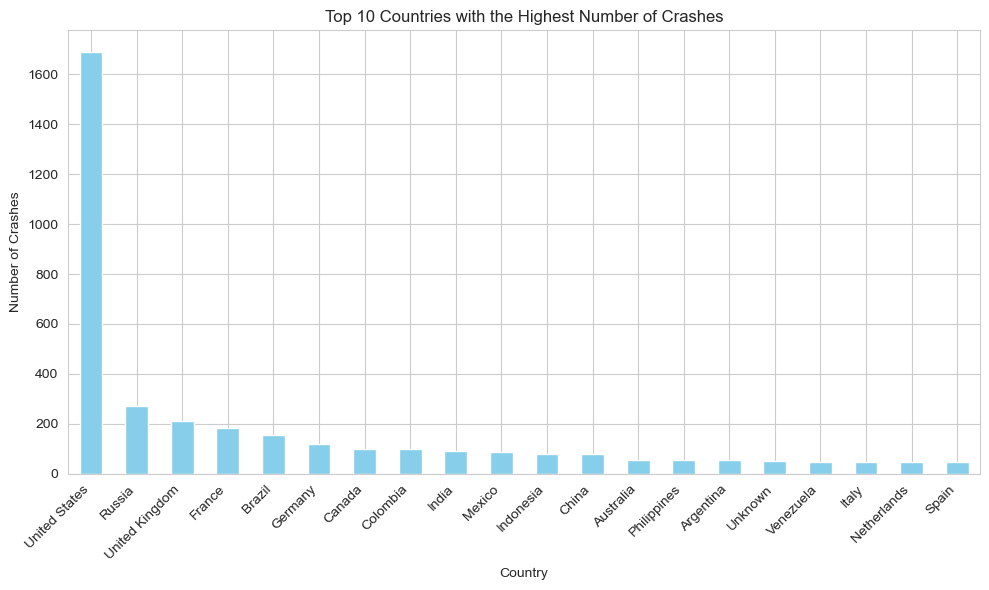

In [282]:

# Assuming 'Operator' column contains data in the format '[name] - [country name]'

# Extract country name
crashes['Country'] = crashes['Operator'].str.split(' - ').str[-1]

# Group by country and count crashes
crashes_by_country = crashes.groupby('Country').size().sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(10, 6))
crashes_by_country.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Highest Number of Crashes')
plt.xlabel('Country')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Data Scraping

In [298]:
import requests
from bs4 import BeautifulSoup

# The base URL of the page containing the ISO codes.
url = 'https://unstats.un.org/unsd/methodology/m49/'

# Send a GET request to the page.
response = requests.get(url)

# If the request was successful, parse the HTML content.
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    # Create a dictionary to store the country and ISO code mappings.
    country_iso_codes = {}

    # Locate the table containing the data (you need to replace 'table-class' with the actual class or id).
    # Here, I'm using a generic 'table' locator, but you may need to inspect the HTML and adjust the locator accordingly.
    table = soup.find('table')

    # Iterate through each row in the table, skipping the header.
    for row in table.find_all('tr')[1:]:
        cells = row.find_all('td')
        # Assuming that the first column contains the country and the fourth contains the ISO code.
        country = cells[0].get_text(strip=True)
        iso_code = cells[2].get_text(strip=True)
        country_iso_codes[country] = iso_code



In [300]:
crashes['ISO_Code'] = crashes['Country'].map(country_iso_codes)

In [305]:
na_iso_codes = crashes[crashes['ISO_Code'].isna()]

# Display the rows with NA ISO codes
na_iso_codes

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Country,ISO_Code
2,1913-08-06,Unknown,"Victoria, British Columbia, Canada",Private,-,Unknown,Curtiss seaplane,Unknown,Unknown,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,Private,NaN
57,1921-12-05,Unknown,"Near Murchinson River, Australia",West Australian Airways,Unknown,Unknown,Bristol 28 Tourer,G-AUDI,6116,3.0,3.0,0.0,NaN,1921,West Australian Airways,NaN
61,1922-04-08,Unknown,"Pao Ting Fou, China",Unknown,Unknown,Unknown,NaN,Unknown,Unknown,17.0,17.0,0.0,All seventeen aboard were Chinese nationals.,1922,Unknown,NaN
65,1922-07-26,Unknown,"Cadix, Spain",Grands Express Aeriens,Unknown,Unknown,Breguet 14,Unknown,Unknown,3.0,3.0,0.0,NaN,1922,Grands Express Aeriens,NaN
67,1922-10-02,Unknown,"Venice, Italy",Unknown,Unknown,Unknown,de Havilland DH-9,G-EAYT,Unknown,4.0,4.0,0.0,NaN,1922,Unknown,NaN
68,1922-10-25,Unknown,"Larache, Morocco",Grands Express Aeriens,Unknown,Unknown,Breguet 14,Unknown,Unknown,2.0,2.0,0.0,NaN,1922,Grands Express Aeriens,NaN
69,1922-12-03,Unknown,"Fez, Morocco",Grands Express Aeriens,Unknown,Unknown,Breguet 14,Unknown,Unknown,1.0,1.0,0.0,NaN,1922,Grands Express Aeriens,NaN
71,1923-01-17,Unknown,"Barcelona, Spain",Grands Express Aeriens,Unknown,Unknown,Breguet 14,F-ALJU,Unknown,1.0,1.0,0.0,NaN,1923,Grands Express Aeriens,NaN
74,1923-05-14,Unknown,"Monsures, France",Grands Express Aeriens,Unknown,Unknown,Farman F-60 Goliath,F-AEBY,Unknown,6.0,6.0,0.0,NaN,1923,Grands Express Aeriens,NaN
78,1923-11-18,Unknown,Russia,CCCP - Soviet Union,Unknown,Unknown,Junkers F-13,D-257,Unknown,4.0,2.0,0.0,NaN,1923,Soviet Union,NaN


In [299]:
country_iso_codes['Russia'] = country_iso_codes.pop('Russian Federation')
country_iso_codes['Iran'] = country_iso_codes.pop('Iran (Islamic Republic of)')
country_iso_codes['Congo'] = country_iso_codes.pop('Democratic Republic of the Congo')
country_iso_codes['Hong Kong'] = country_iso_codes.pop('China, Hong Kong Special Administrative Region')
country_iso_codes['Laos'] = country_iso_codes.pop("Lao People's Democratic Republic")
country_iso_codes['Netherlands'] = country_iso_codes.pop('Netherlands (Kingdom of the)')
country_iso_codes['South Korea'] = country_iso_codes.pop('Republic of Korea')
country_iso_codes['United Kingdom'] = country_iso_codes.pop('United Kingdom of Great Britain and Northern Ireland')
country_iso_codes['United States'] = country_iso_codes.pop('United States of America')
country_iso_codes['Venezuela'] = country_iso_codes.pop('Venezuela (Bolivarian Republic of)')

In [2]:
import plotly.express as px
crashes_count = crashes.groupby('ISO_Code').size().reset_index(name='counts')


fig = px.choropleth(crashes_count, 
                    locations="ISO_Code",
                    color="counts",
                    hover_name="ISO_Code",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Number of Plane Crashes per Country')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


NameError: name 'crashes' is not defined

In [311]:
crashes.to_csv('cleaned_crashes.csv', index = False)

In [1]:
import plotly.graph_objs as go

fig = go.Figure(data=go.Scattergeo(
    lon = [0],  # Placeholder longitude values
    lat = [0],  # Placeholder latitude values
    text = crashes_count['counts'],
    mode = 'markers',
    marker = dict(
        size = crashes_count['counts'],
        color = crashes_count['counts'],
        colorscale = 'Viridis',
        colorbar_title = "Number of Crashes",
        sizemode = 'area',
    )
))

fig.update_geos(
    projection_type="orthographic",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue"
)

fig.update_layout(
    title=dict(
        text="Number of Plane Crashes per Country",
        xanchor="center",
        x=0.5,
    ),
    geo=dict(
        showland=True,
        showcountries=True,
        countrywidth=0.5,
        landcolor="rgb(243, 243, 243)",
        countrycolor="rgb(204, 204, 204)"
    )
)

fig.show()


NameError: name 'crashes_count' is not defined